# Семинар 5

## Часть 1: Generative Models (1 час)

![image](https://miro.medium.com/1*_5GpdejeOvt61ew4aPtT_g.png)


**Discriminative** vs **Generative**

Представьте, что вы учитесь различать кошек и собак:


Discriminative подход (классификация):

* Смотрите на фото
* Говорите: "Это кошка" или "Это собака"
* Учитесь различать уже существующие объекты
* Примеры: ResNet, YOLO, любые классификаторы

Generative подход:

* Учитесь понимать, как выглядят кошки
* Можете создать новую фотографию кошки, которой раньше не существовало
* Понимаете внутреннюю структуру данных


Зачем это нужно?
* Генерация контента: изображения, музыка, текст
* Дополнение данных: когда мало обучающих примеров
* Понимание данных: что делает кошку кошкой?
* Творчество: искусство, дизайн, реклама

### 1.1 GAN (Generative Adversarial Networks) — борьба двух сетей


![gan](https://media.licdn.com/dms/image/v2/D4D12AQG9AdDLZB5i0w/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1684487899578?e=2147483647&v=beta&t=FsAQZrs-o-gpWqvy_eyVnn8VIhZHLeizU0G6bf_1Spg)


Представьте:

Generator (Фальшивомонетчик):

* Пытается создать поддельные деньги
* Начинает плохо (детектив сразу видит подделку)
* Постепенно учится делать всё лучше и лучше

Discriminator (Детектив):

* Пытается отличить настоящие деньги от поддельных
* Сначала легко находит подделки
* Но фальшивомонетчик становится лучше → детектив тоже должен совершенствоваться

**Результат**:
Фальшивомонетчик становится настолько хорош, что детектив уже не может отличить подделку от оригинала!

Как это работает технически?

**Шаг 1: Generator создаёт fake**

```
Случайный шум (числа)
    ↓
Generator (нейросеть)
    ↓
Изображение лица
```

**Шаг 2: Discriminator оценивает**

```
Настоящее фото → Discriminator → "Вероятность 0.9, что настоящее"
Fake фото → Discriminator → "Вероятность 0.1, что настоящее"
```

**Шаг 3: Обучение обеих сетей**

Discriminator учится:

* Для настоящих фото выдавать ближе к 1
* Для fake выдавать ближе к 0

Generator учится:

* Обмануть Discriminator (чтобы он выдал 1 для fake)

Проблемы GAN
1. Mode Collapse (коллапс мод)

* Generator находит "один работающий трюк"
* Генерирует только 2-3 типа лиц вместо разнообразия
* Как человек, который выучил одну шутку и постоянно её повторяет

2. Training Instability (нестабильность)

* Сложно найти баланс между G и D
* Если Discriminator слишком хорош → Generator не учится
* Если Generator слишком хорош → Discriminator не помогает
* Как качели: нужно поймать равновесие

3. Vanishing Gradients

* Если D уверенно говорит "это fake" → градиенты для G исчезают
* G перестаёт учиться

Epoch [0/50] Batch 0/938 D_loss: 1.4164 G_loss: 0.6773
Epoch [0/50] Batch 100/938 D_loss: 1.3310 G_loss: 0.7340
Epoch [0/50] Batch 200/938 D_loss: 1.3222 G_loss: 0.8978
Epoch [0/50] Batch 300/938 D_loss: 1.0998 G_loss: 0.9451
Epoch [0/50] Batch 400/938 D_loss: 0.9061 G_loss: 1.1829
Epoch [0/50] Batch 500/938 D_loss: 0.9364 G_loss: 1.2549
Epoch [0/50] Batch 600/938 D_loss: 0.9990 G_loss: 1.2373
Epoch [0/50] Batch 700/938 D_loss: 0.9270 G_loss: 1.7667
Epoch [0/50] Batch 800/938 D_loss: 1.0289 G_loss: 1.3454
Epoch [0/50] Batch 900/938 D_loss: 0.9090 G_loss: 1.6236


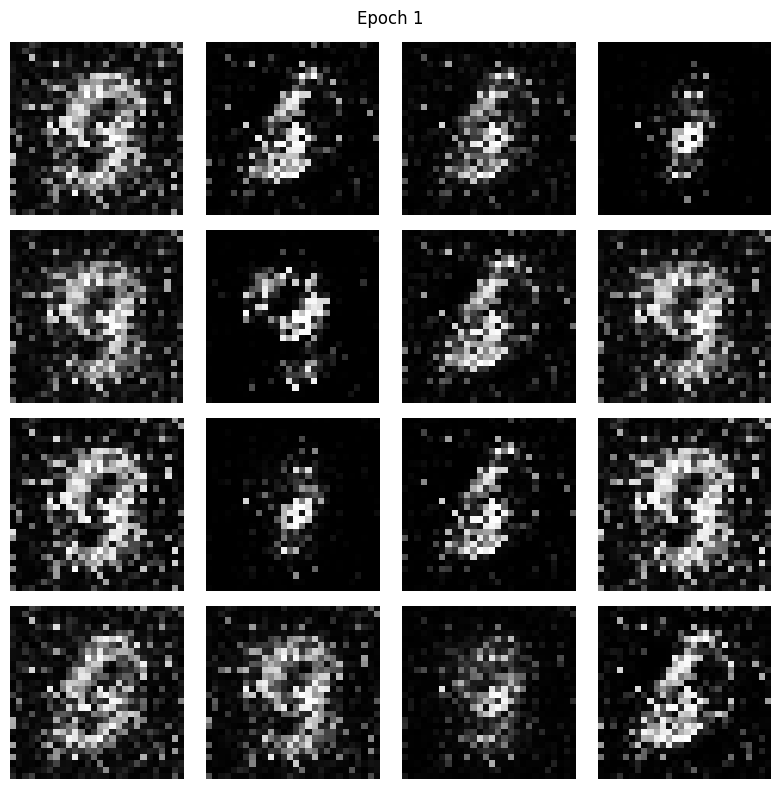

Epoch [1/50] Batch 0/938 D_loss: 0.9070 G_loss: 1.3734
Epoch [1/50] Batch 100/938 D_loss: 0.7941 G_loss: 2.1729
Epoch [1/50] Batch 200/938 D_loss: 0.8011 G_loss: 2.3948
Epoch [1/50] Batch 300/938 D_loss: 0.8895 G_loss: 1.6068
Epoch [1/50] Batch 400/938 D_loss: 1.0428 G_loss: 2.0012
Epoch [1/50] Batch 500/938 D_loss: 0.7992 G_loss: 1.4938
Epoch [1/50] Batch 600/938 D_loss: 0.9441 G_loss: 2.0724
Epoch [1/50] Batch 700/938 D_loss: 0.7721 G_loss: 1.4081
Epoch [1/50] Batch 800/938 D_loss: 1.0675 G_loss: 1.9008
Epoch [1/50] Batch 900/938 D_loss: 0.8233 G_loss: 1.9987


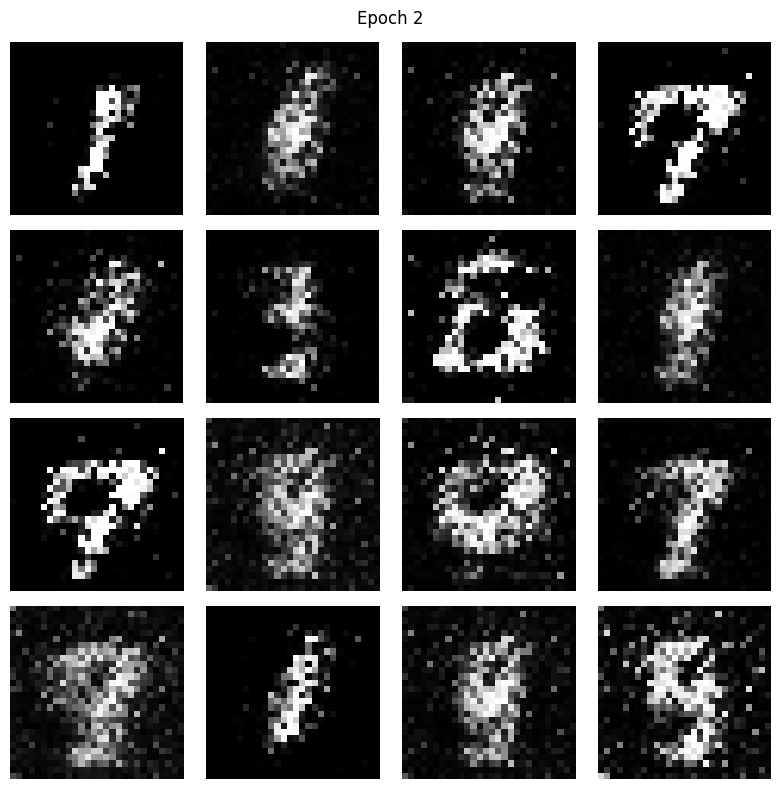

Epoch [2/50] Batch 0/938 D_loss: 0.9144 G_loss: 1.6580
Epoch [2/50] Batch 100/938 D_loss: 0.8847 G_loss: 1.4518
Epoch [2/50] Batch 200/938 D_loss: 0.6904 G_loss: 2.6891
Epoch [2/50] Batch 300/938 D_loss: 0.7154 G_loss: 1.7819
Epoch [2/50] Batch 400/938 D_loss: 0.7321 G_loss: 1.9745
Epoch [2/50] Batch 500/938 D_loss: 0.7399 G_loss: 2.1464
Epoch [2/50] Batch 600/938 D_loss: 0.9922 G_loss: 2.2658
Epoch [2/50] Batch 700/938 D_loss: 0.9388 G_loss: 1.9301
Epoch [2/50] Batch 800/938 D_loss: 0.7977 G_loss: 1.5309
Epoch [2/50] Batch 900/938 D_loss: 0.8740 G_loss: 1.6287


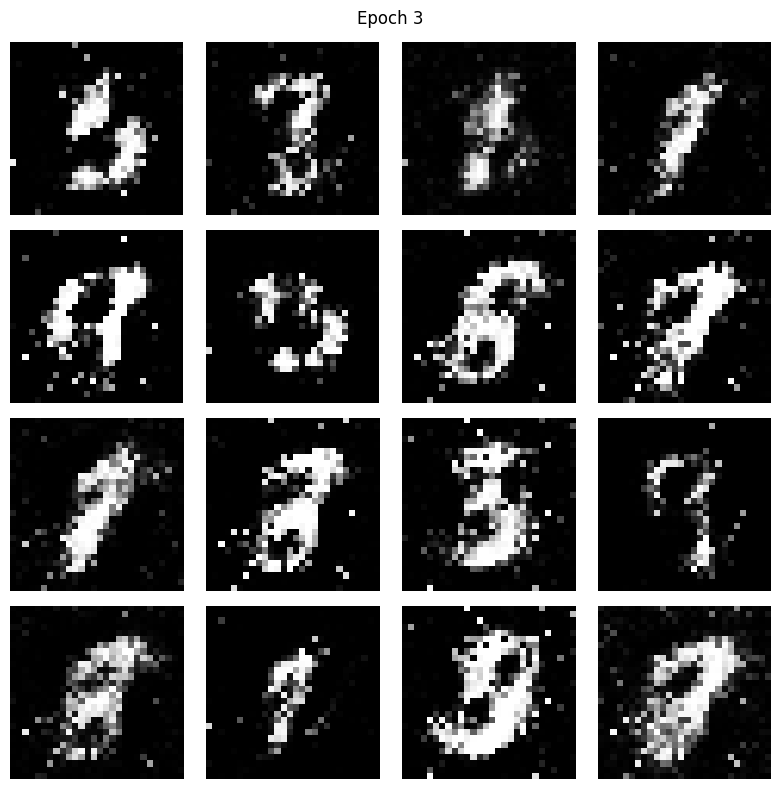

Epoch [3/50] Batch 0/938 D_loss: 0.8096 G_loss: 1.3491
Epoch [3/50] Batch 100/938 D_loss: 0.6584 G_loss: 2.3660
Epoch [3/50] Batch 200/938 D_loss: 0.6555 G_loss: 1.8149
Epoch [3/50] Batch 300/938 D_loss: 0.8942 G_loss: 2.9363
Epoch [3/50] Batch 400/938 D_loss: 0.9154 G_loss: 2.8351
Epoch [3/50] Batch 500/938 D_loss: 0.9240 G_loss: 2.3713
Epoch [3/50] Batch 600/938 D_loss: 0.8916 G_loss: 1.1521
Epoch [3/50] Batch 700/938 D_loss: 0.9924 G_loss: 1.3304
Epoch [3/50] Batch 800/938 D_loss: 0.8179 G_loss: 1.6313
Epoch [3/50] Batch 900/938 D_loss: 0.8645 G_loss: 2.2661


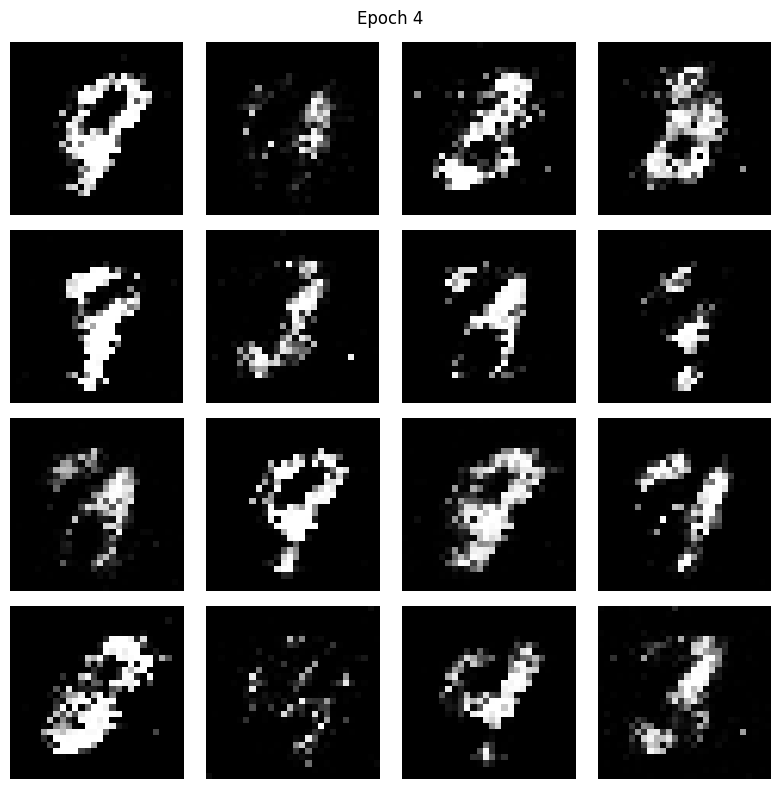

Epoch [4/50] Batch 0/938 D_loss: 0.8675 G_loss: 2.0964
Epoch [4/50] Batch 100/938 D_loss: 0.9438 G_loss: 2.0387
Epoch [4/50] Batch 200/938 D_loss: 1.0944 G_loss: 1.3221
Epoch [4/50] Batch 300/938 D_loss: 1.0480 G_loss: 2.4248
Epoch [4/50] Batch 400/938 D_loss: 0.8536 G_loss: 1.4964
Epoch [4/50] Batch 500/938 D_loss: 0.7909 G_loss: 1.6947
Epoch [4/50] Batch 600/938 D_loss: 0.9052 G_loss: 1.5949
Epoch [4/50] Batch 700/938 D_loss: 0.8540 G_loss: 1.1211
Epoch [4/50] Batch 800/938 D_loss: 0.9376 G_loss: 1.6839
Epoch [4/50] Batch 900/938 D_loss: 0.9538 G_loss: 1.4461


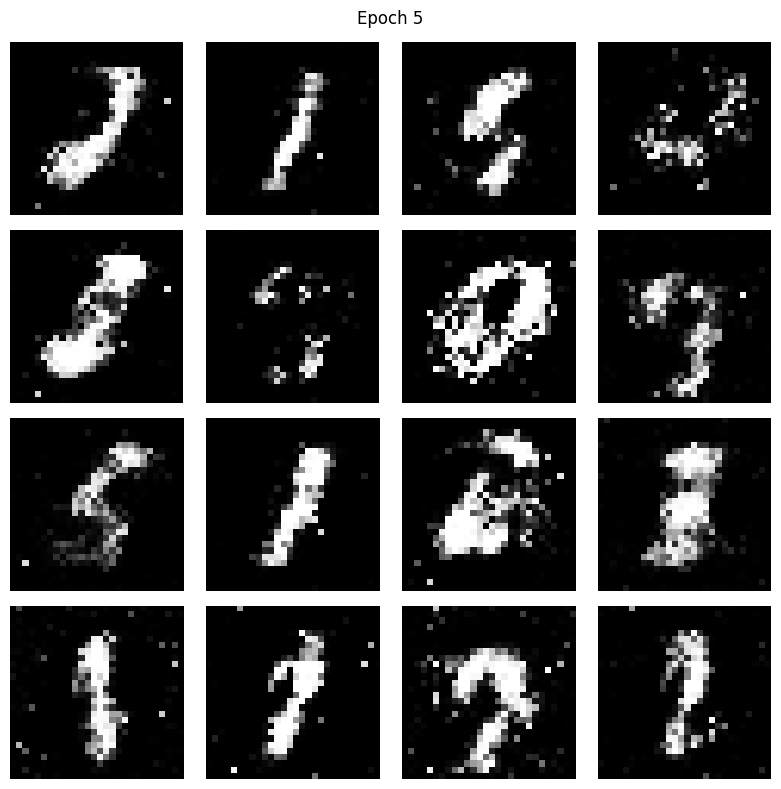

Epoch [5/50] Batch 0/938 D_loss: 1.0856 G_loss: 0.8927
Epoch [5/50] Batch 100/938 D_loss: 0.9935 G_loss: 1.7260
Epoch [5/50] Batch 200/938 D_loss: 0.9656 G_loss: 1.2945
Epoch [5/50] Batch 300/938 D_loss: 0.8635 G_loss: 0.9601
Epoch [5/50] Batch 400/938 D_loss: 0.8399 G_loss: 1.4434
Epoch [5/50] Batch 500/938 D_loss: 0.8743 G_loss: 1.4929
Epoch [5/50] Batch 600/938 D_loss: 0.8193 G_loss: 1.4586
Epoch [5/50] Batch 700/938 D_loss: 0.9278 G_loss: 1.3356
Epoch [5/50] Batch 800/938 D_loss: 0.9871 G_loss: 1.1085
Epoch [5/50] Batch 900/938 D_loss: 1.1099 G_loss: 1.6264


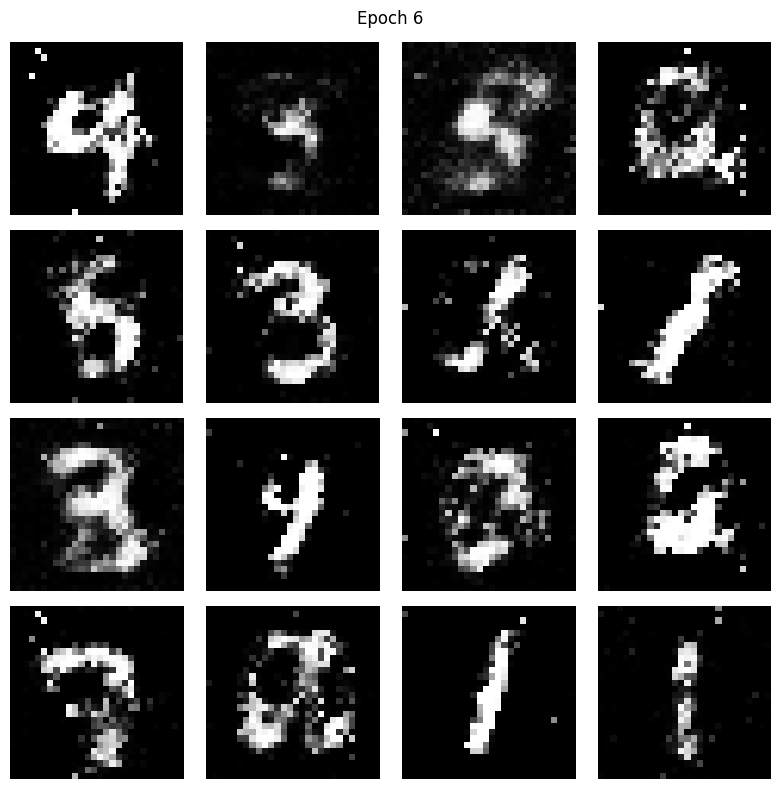

Epoch [6/50] Batch 0/938 D_loss: 1.1384 G_loss: 1.8490
Epoch [6/50] Batch 100/938 D_loss: 1.0832 G_loss: 1.4838
Epoch [6/50] Batch 200/938 D_loss: 1.1078 G_loss: 1.0240
Epoch [6/50] Batch 300/938 D_loss: 0.9684 G_loss: 0.8749
Epoch [6/50] Batch 400/938 D_loss: 1.0806 G_loss: 1.4758
Epoch [6/50] Batch 500/938 D_loss: 1.0574 G_loss: 1.4345
Epoch [6/50] Batch 600/938 D_loss: 1.0058 G_loss: 0.9473
Epoch [6/50] Batch 700/938 D_loss: 1.3766 G_loss: 1.1692
Epoch [6/50] Batch 800/938 D_loss: 0.9786 G_loss: 1.1481
Epoch [6/50] Batch 900/938 D_loss: 1.0845 G_loss: 1.5383


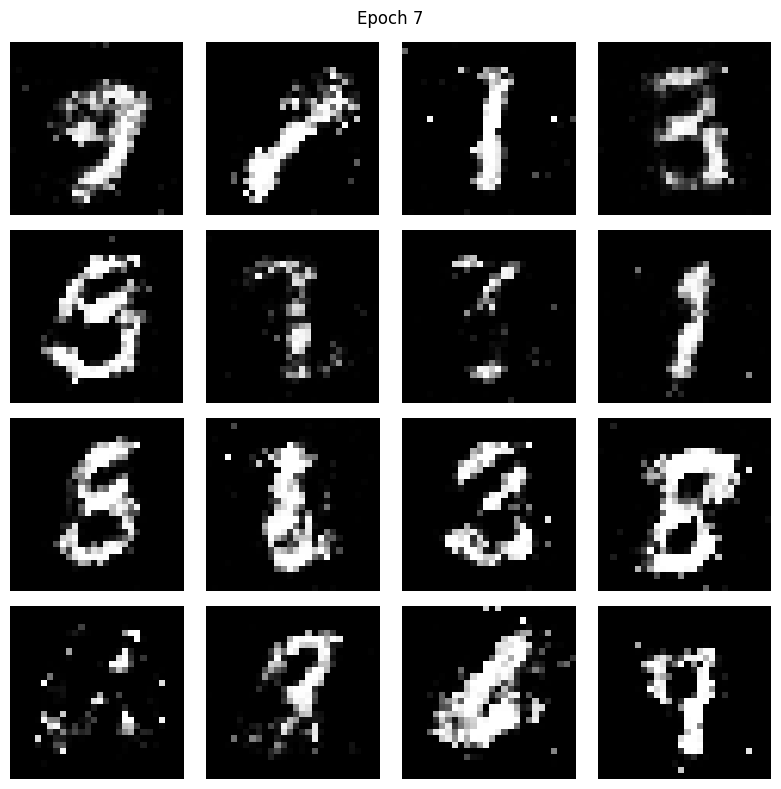

Epoch [7/50] Batch 0/938 D_loss: 1.0641 G_loss: 0.8886
Epoch [7/50] Batch 100/938 D_loss: 1.1281 G_loss: 1.1378
Epoch [7/50] Batch 200/938 D_loss: 1.1861 G_loss: 1.1889
Epoch [7/50] Batch 300/938 D_loss: 1.1979 G_loss: 1.1162
Epoch [7/50] Batch 400/938 D_loss: 1.1440 G_loss: 1.0631
Epoch [7/50] Batch 500/938 D_loss: 1.2560 G_loss: 0.8998
Epoch [7/50] Batch 600/938 D_loss: 1.0345 G_loss: 0.9286
Epoch [7/50] Batch 700/938 D_loss: 1.1053 G_loss: 0.9089
Epoch [7/50] Batch 800/938 D_loss: 1.1627 G_loss: 0.8777
Epoch [7/50] Batch 900/938 D_loss: 1.1385 G_loss: 1.1333


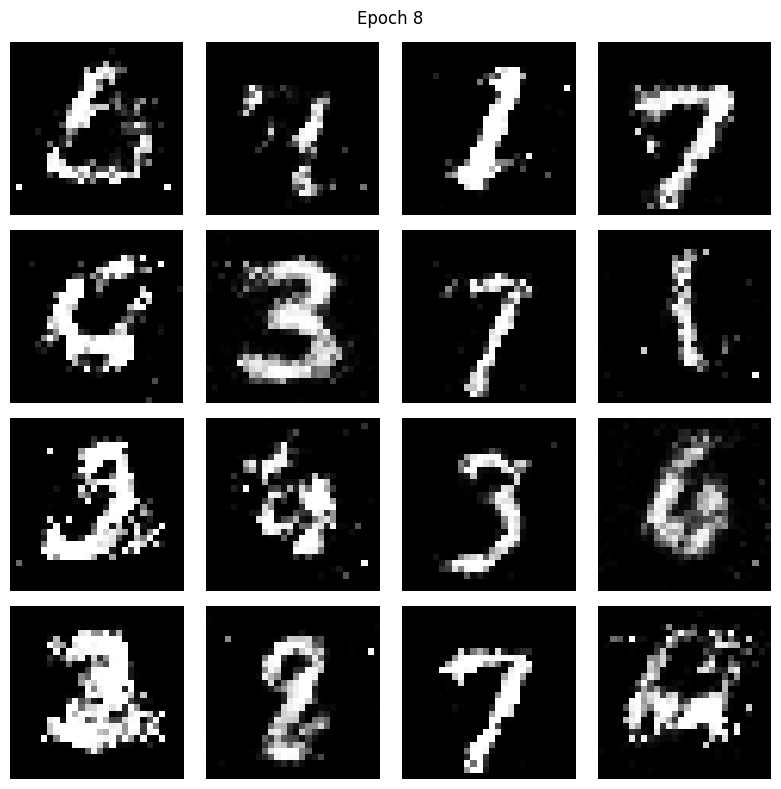

Epoch [8/50] Batch 0/938 D_loss: 1.1544 G_loss: 1.0797
Epoch [8/50] Batch 100/938 D_loss: 1.1909 G_loss: 1.1450
Epoch [8/50] Batch 200/938 D_loss: 1.2958 G_loss: 0.9222
Epoch [8/50] Batch 300/938 D_loss: 1.1860 G_loss: 0.9175
Epoch [8/50] Batch 400/938 D_loss: 1.2219 G_loss: 1.0531
Epoch [8/50] Batch 500/938 D_loss: 1.2444 G_loss: 1.2064
Epoch [8/50] Batch 600/938 D_loss: 1.1974 G_loss: 1.0121
Epoch [8/50] Batch 700/938 D_loss: 1.1067 G_loss: 0.9087
Epoch [8/50] Batch 800/938 D_loss: 1.1421 G_loss: 0.9890
Epoch [8/50] Batch 900/938 D_loss: 1.3195 G_loss: 1.0543


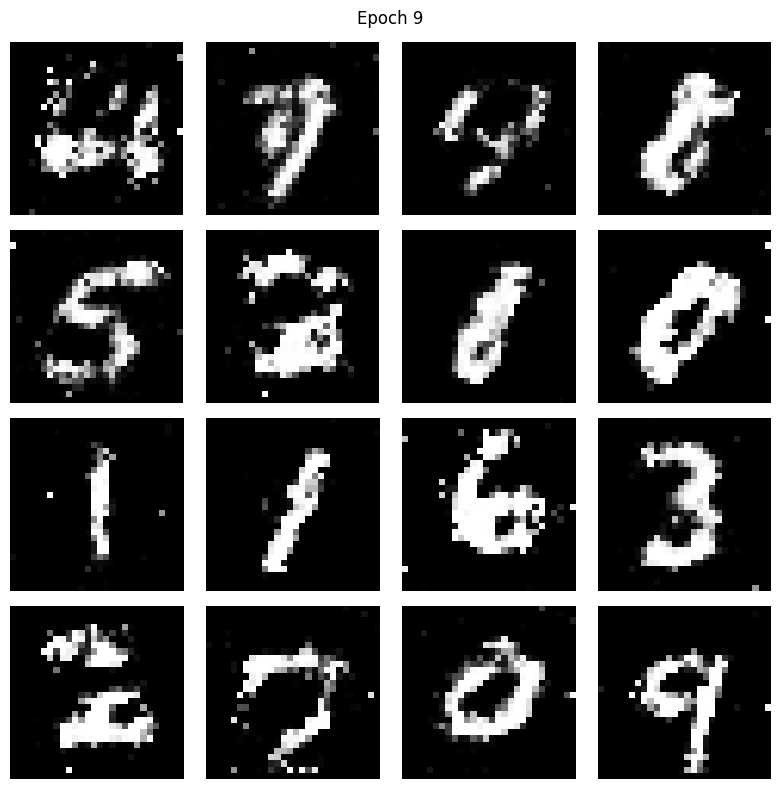

Epoch [9/50] Batch 0/938 D_loss: 1.1168 G_loss: 1.2361
Epoch [9/50] Batch 100/938 D_loss: 1.0472 G_loss: 1.1710
Epoch [9/50] Batch 200/938 D_loss: 1.1148 G_loss: 0.9905
Epoch [9/50] Batch 300/938 D_loss: 1.1418 G_loss: 1.1419
Epoch [9/50] Batch 400/938 D_loss: 1.3489 G_loss: 1.1127
Epoch [9/50] Batch 500/938 D_loss: 1.1459 G_loss: 0.7848
Epoch [9/50] Batch 600/938 D_loss: 1.0542 G_loss: 1.1562
Epoch [9/50] Batch 700/938 D_loss: 1.2011 G_loss: 1.0228
Epoch [9/50] Batch 800/938 D_loss: 1.3276 G_loss: 0.9701
Epoch [9/50] Batch 900/938 D_loss: 1.2572 G_loss: 0.9830


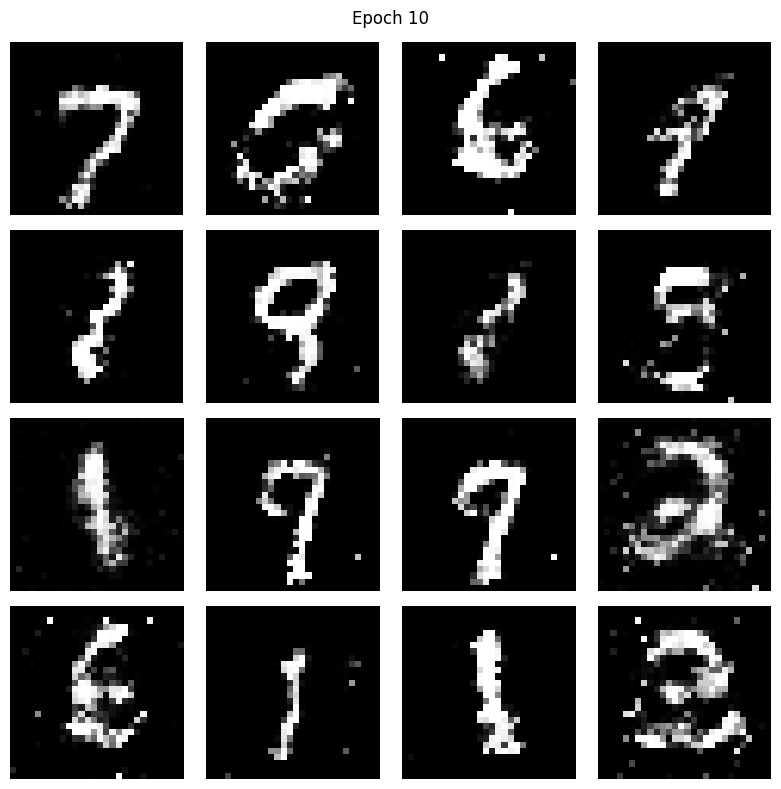

Epoch [10/50] Batch 0/938 D_loss: 1.2686 G_loss: 1.1030
Epoch [10/50] Batch 100/938 D_loss: 1.2507 G_loss: 1.1181
Epoch [10/50] Batch 200/938 D_loss: 1.2203 G_loss: 0.8798
Epoch [10/50] Batch 300/938 D_loss: 1.1327 G_loss: 1.0636
Epoch [10/50] Batch 400/938 D_loss: 1.2941 G_loss: 1.1193
Epoch [10/50] Batch 500/938 D_loss: 1.2099 G_loss: 0.9404
Epoch [10/50] Batch 600/938 D_loss: 1.3850 G_loss: 0.7433
Epoch [10/50] Batch 700/938 D_loss: 1.2979 G_loss: 0.8045
Epoch [10/50] Batch 800/938 D_loss: 1.2565 G_loss: 1.0783
Epoch [10/50] Batch 900/938 D_loss: 1.2173 G_loss: 1.2825


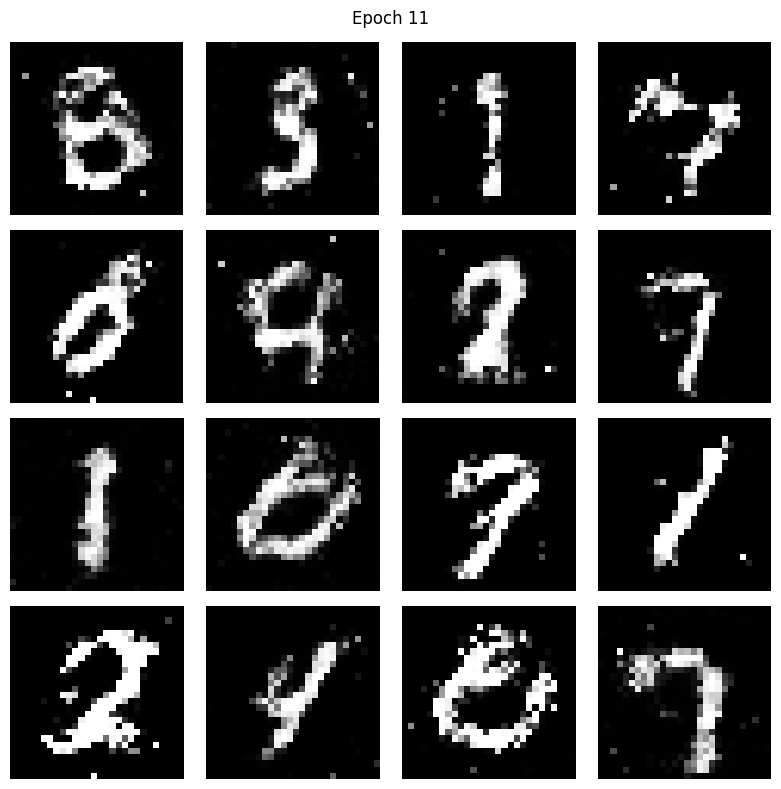

Epoch [11/50] Batch 0/938 D_loss: 1.0911 G_loss: 0.9796
Epoch [11/50] Batch 100/938 D_loss: 1.2999 G_loss: 0.9332
Epoch [11/50] Batch 200/938 D_loss: 1.2680 G_loss: 0.9232
Epoch [11/50] Batch 300/938 D_loss: 1.2785 G_loss: 1.0863
Epoch [11/50] Batch 400/938 D_loss: 1.1861 G_loss: 1.0483
Epoch [11/50] Batch 500/938 D_loss: 1.2714 G_loss: 0.8740
Epoch [11/50] Batch 600/938 D_loss: 1.2624 G_loss: 1.0102
Epoch [11/50] Batch 700/938 D_loss: 1.2666 G_loss: 1.0412
Epoch [11/50] Batch 800/938 D_loss: 1.1744 G_loss: 0.9660
Epoch [11/50] Batch 900/938 D_loss: 1.2912 G_loss: 0.9794


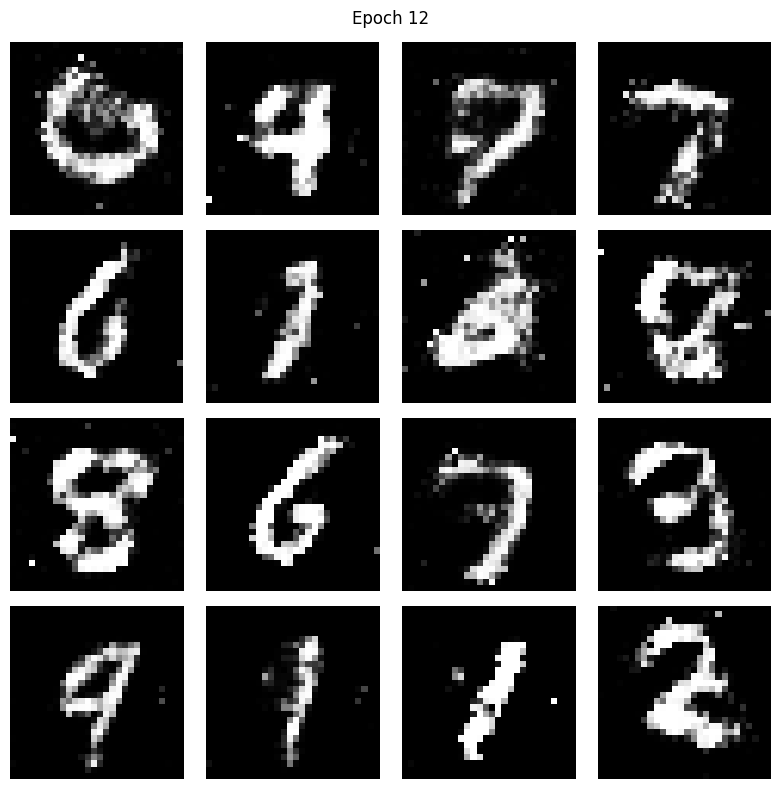

Epoch [12/50] Batch 0/938 D_loss: 1.2870 G_loss: 1.0156
Epoch [12/50] Batch 100/938 D_loss: 1.1480 G_loss: 1.0526
Epoch [12/50] Batch 200/938 D_loss: 1.2063 G_loss: 1.0091
Epoch [12/50] Batch 300/938 D_loss: 1.2290 G_loss: 0.8885
Epoch [12/50] Batch 400/938 D_loss: 1.1486 G_loss: 0.8023
Epoch [12/50] Batch 500/938 D_loss: 1.1783 G_loss: 0.9867
Epoch [12/50] Batch 600/938 D_loss: 1.2425 G_loss: 1.0069
Epoch [12/50] Batch 700/938 D_loss: 1.0963 G_loss: 0.9374
Epoch [12/50] Batch 800/938 D_loss: 1.2346 G_loss: 0.9281
Epoch [12/50] Batch 900/938 D_loss: 1.1861 G_loss: 1.0508


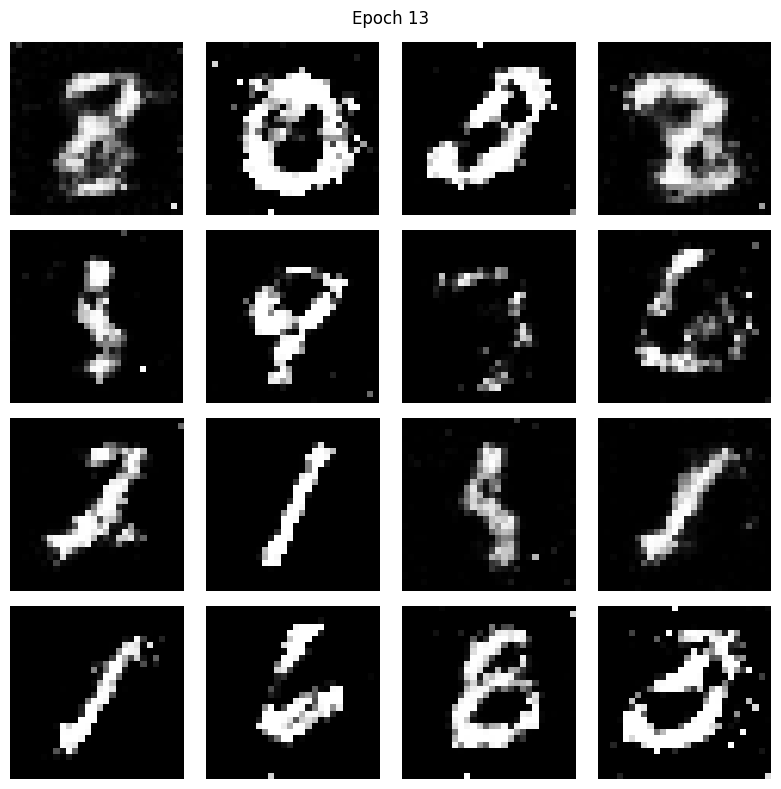

Epoch [13/50] Batch 0/938 D_loss: 1.1503 G_loss: 0.9907
Epoch [13/50] Batch 100/938 D_loss: 1.3121 G_loss: 1.1569
Epoch [13/50] Batch 200/938 D_loss: 1.1990 G_loss: 0.9524
Epoch [13/50] Batch 300/938 D_loss: 1.3504 G_loss: 1.2135
Epoch [13/50] Batch 400/938 D_loss: 1.2463 G_loss: 0.8284
Epoch [13/50] Batch 500/938 D_loss: 1.1746 G_loss: 1.1727
Epoch [13/50] Batch 600/938 D_loss: 1.1054 G_loss: 0.9362
Epoch [13/50] Batch 700/938 D_loss: 1.2537 G_loss: 0.9596
Epoch [13/50] Batch 800/938 D_loss: 1.3021 G_loss: 0.7920
Epoch [13/50] Batch 900/938 D_loss: 1.2568 G_loss: 0.8345


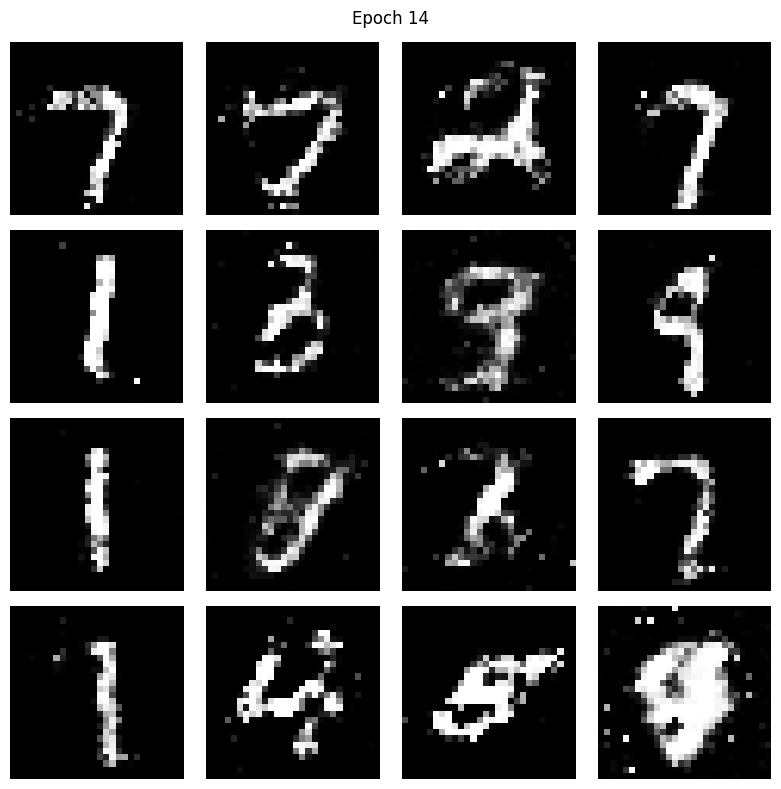

Epoch [14/50] Batch 0/938 D_loss: 1.2770 G_loss: 0.8276
Epoch [14/50] Batch 100/938 D_loss: 1.2267 G_loss: 1.0262
Epoch [14/50] Batch 200/938 D_loss: 1.2858 G_loss: 0.9303
Epoch [14/50] Batch 300/938 D_loss: 1.2532 G_loss: 0.9533
Epoch [14/50] Batch 400/938 D_loss: 1.2186 G_loss: 0.8218
Epoch [14/50] Batch 500/938 D_loss: 1.1891 G_loss: 1.0132
Epoch [14/50] Batch 600/938 D_loss: 1.1457 G_loss: 0.8989
Epoch [14/50] Batch 700/938 D_loss: 1.3610 G_loss: 0.9815
Epoch [14/50] Batch 800/938 D_loss: 1.2418 G_loss: 0.8726
Epoch [14/50] Batch 900/938 D_loss: 1.2500 G_loss: 1.0782


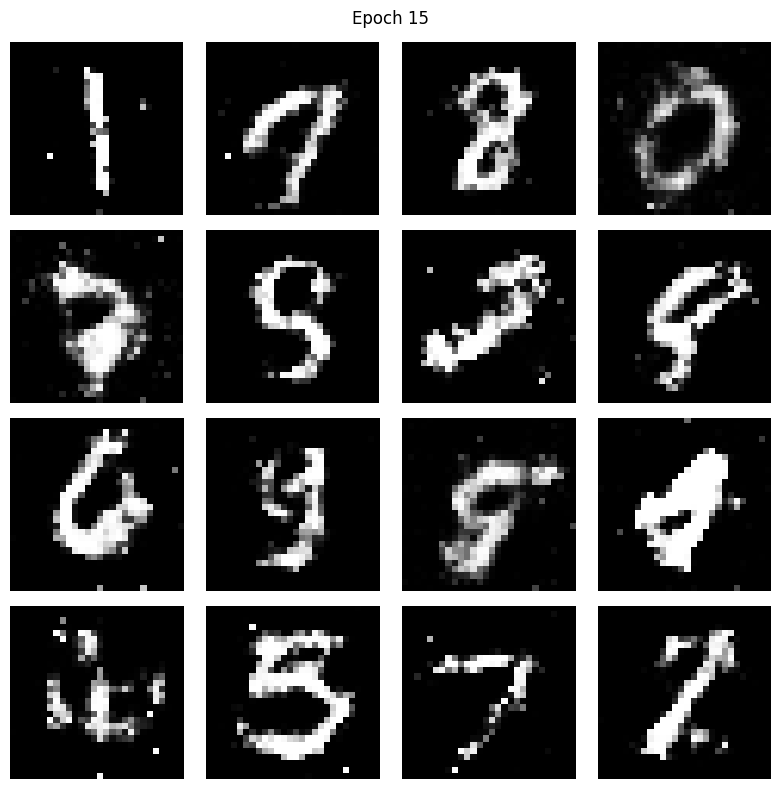

Epoch [15/50] Batch 0/938 D_loss: 1.2234 G_loss: 1.0490
Epoch [15/50] Batch 100/938 D_loss: 1.2239 G_loss: 0.9832
Epoch [15/50] Batch 200/938 D_loss: 1.1971 G_loss: 0.8208
Epoch [15/50] Batch 300/938 D_loss: 1.2595 G_loss: 1.0353
Epoch [15/50] Batch 400/938 D_loss: 1.2432 G_loss: 0.9798
Epoch [15/50] Batch 500/938 D_loss: 1.1967 G_loss: 0.8741
Epoch [15/50] Batch 600/938 D_loss: 1.1611 G_loss: 0.7351
Epoch [15/50] Batch 700/938 D_loss: 1.1451 G_loss: 1.1940
Epoch [15/50] Batch 800/938 D_loss: 1.3217 G_loss: 0.8715
Epoch [15/50] Batch 900/938 D_loss: 1.2552 G_loss: 0.7635


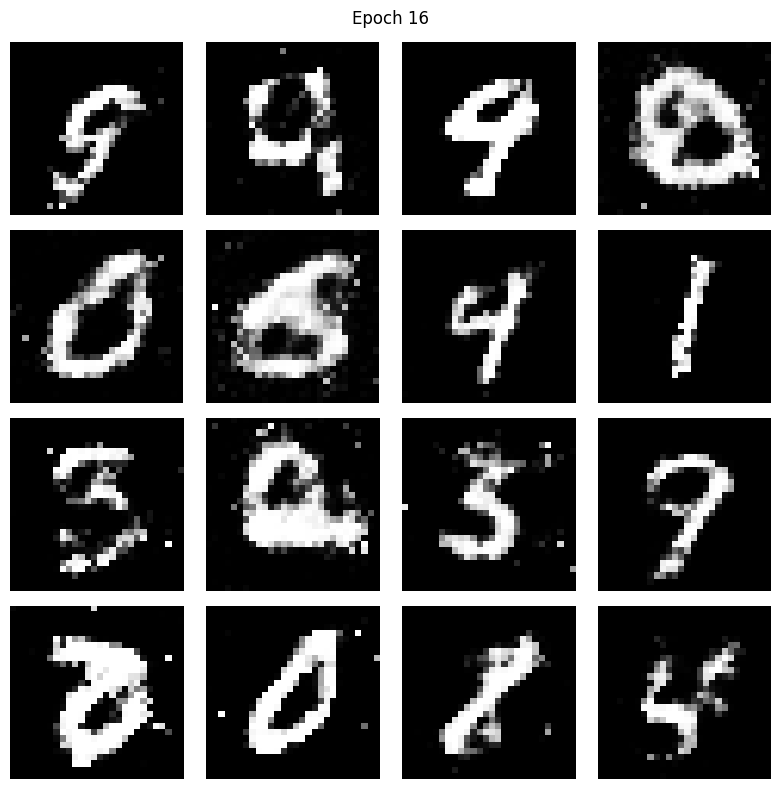

Epoch [16/50] Batch 0/938 D_loss: 1.2589 G_loss: 0.8165
Epoch [16/50] Batch 100/938 D_loss: 1.2211 G_loss: 0.7854
Epoch [16/50] Batch 200/938 D_loss: 1.2513 G_loss: 0.9462
Epoch [16/50] Batch 300/938 D_loss: 1.1849 G_loss: 0.8699
Epoch [16/50] Batch 400/938 D_loss: 1.1399 G_loss: 0.8829
Epoch [16/50] Batch 500/938 D_loss: 1.2144 G_loss: 0.9836
Epoch [16/50] Batch 600/938 D_loss: 1.2357 G_loss: 0.9148
Epoch [16/50] Batch 700/938 D_loss: 1.2055 G_loss: 1.0232
Epoch [16/50] Batch 800/938 D_loss: 1.2703 G_loss: 0.8538
Epoch [16/50] Batch 900/938 D_loss: 1.1550 G_loss: 0.8538


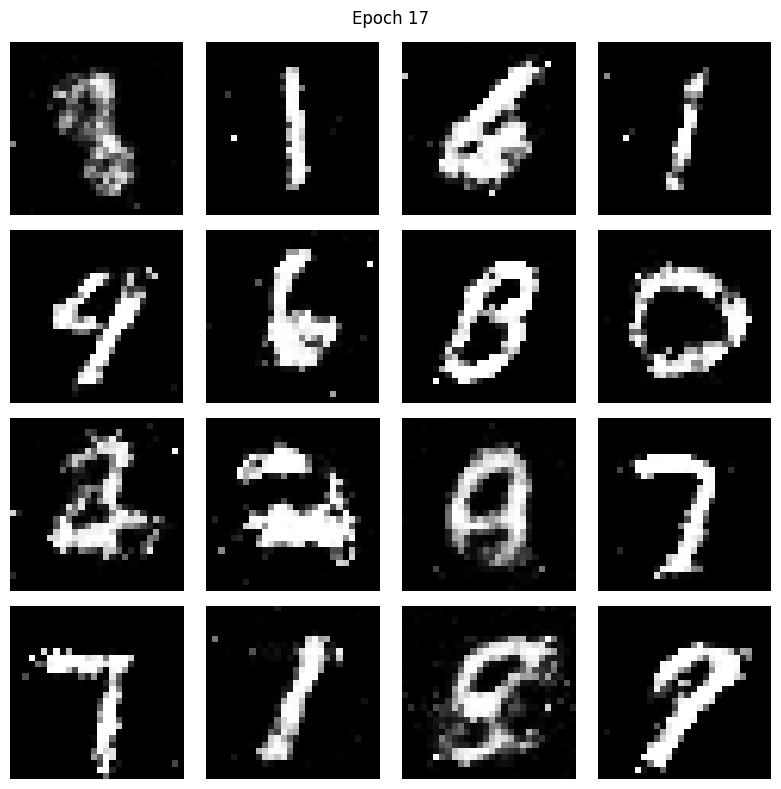

Epoch [17/50] Batch 0/938 D_loss: 1.0998 G_loss: 0.9650
Epoch [17/50] Batch 100/938 D_loss: 1.3020 G_loss: 0.9658
Epoch [17/50] Batch 200/938 D_loss: 1.1972 G_loss: 0.9742
Epoch [17/50] Batch 300/938 D_loss: 1.1994 G_loss: 0.8139
Epoch [17/50] Batch 400/938 D_loss: 1.1439 G_loss: 1.0181
Epoch [17/50] Batch 500/938 D_loss: 1.1336 G_loss: 1.0769
Epoch [17/50] Batch 600/938 D_loss: 1.2977 G_loss: 0.8218
Epoch [17/50] Batch 700/938 D_loss: 1.1756 G_loss: 0.9405
Epoch [17/50] Batch 800/938 D_loss: 1.2477 G_loss: 0.7933
Epoch [17/50] Batch 900/938 D_loss: 1.1702 G_loss: 1.0634


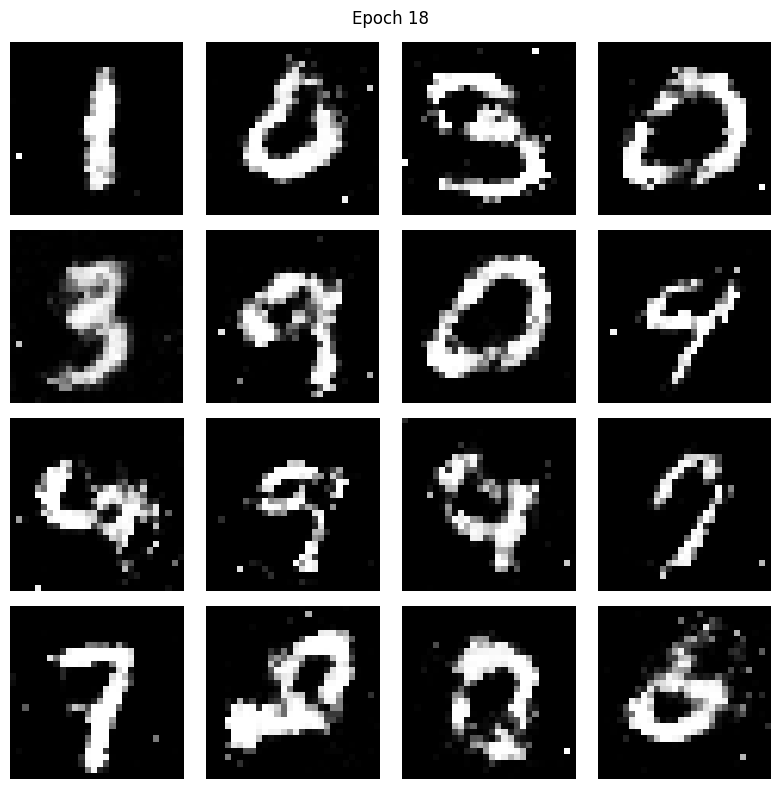

Epoch [18/50] Batch 0/938 D_loss: 1.3253 G_loss: 0.8486
Epoch [18/50] Batch 100/938 D_loss: 1.2348 G_loss: 1.2305
Epoch [18/50] Batch 200/938 D_loss: 1.3834 G_loss: 0.9968
Epoch [18/50] Batch 300/938 D_loss: 1.2885 G_loss: 0.9893
Epoch [18/50] Batch 400/938 D_loss: 1.2632 G_loss: 0.9775
Epoch [18/50] Batch 500/938 D_loss: 1.4733 G_loss: 0.8969
Epoch [18/50] Batch 600/938 D_loss: 1.1954 G_loss: 0.9247
Epoch [18/50] Batch 700/938 D_loss: 1.2457 G_loss: 0.8159
Epoch [18/50] Batch 800/938 D_loss: 1.1436 G_loss: 0.7062
Epoch [18/50] Batch 900/938 D_loss: 1.2112 G_loss: 0.8473


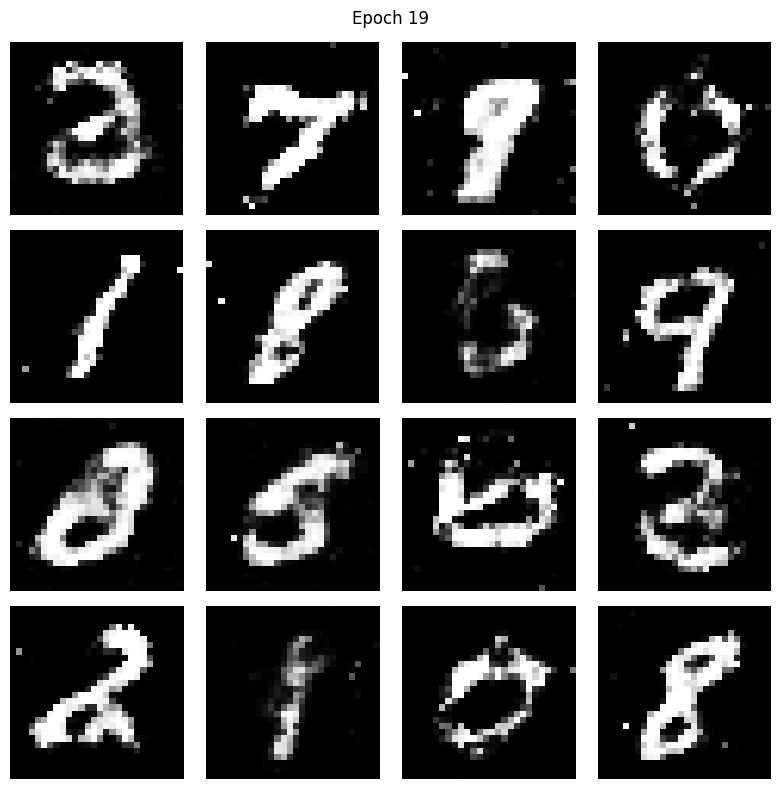

Epoch [19/50] Batch 0/938 D_loss: 1.3514 G_loss: 1.0522
Epoch [19/50] Batch 100/938 D_loss: 1.2786 G_loss: 0.9129
Epoch [19/50] Batch 200/938 D_loss: 1.2637 G_loss: 0.9782
Epoch [19/50] Batch 300/938 D_loss: 1.0777 G_loss: 0.8435
Epoch [19/50] Batch 400/938 D_loss: 1.3399 G_loss: 0.8705
Epoch [19/50] Batch 500/938 D_loss: 1.2354 G_loss: 0.9876
Epoch [19/50] Batch 600/938 D_loss: 1.2325 G_loss: 0.8095
Epoch [19/50] Batch 700/938 D_loss: 1.2254 G_loss: 0.8870
Epoch [19/50] Batch 800/938 D_loss: 1.3289 G_loss: 0.8060
Epoch [19/50] Batch 900/938 D_loss: 1.1972 G_loss: 1.0826


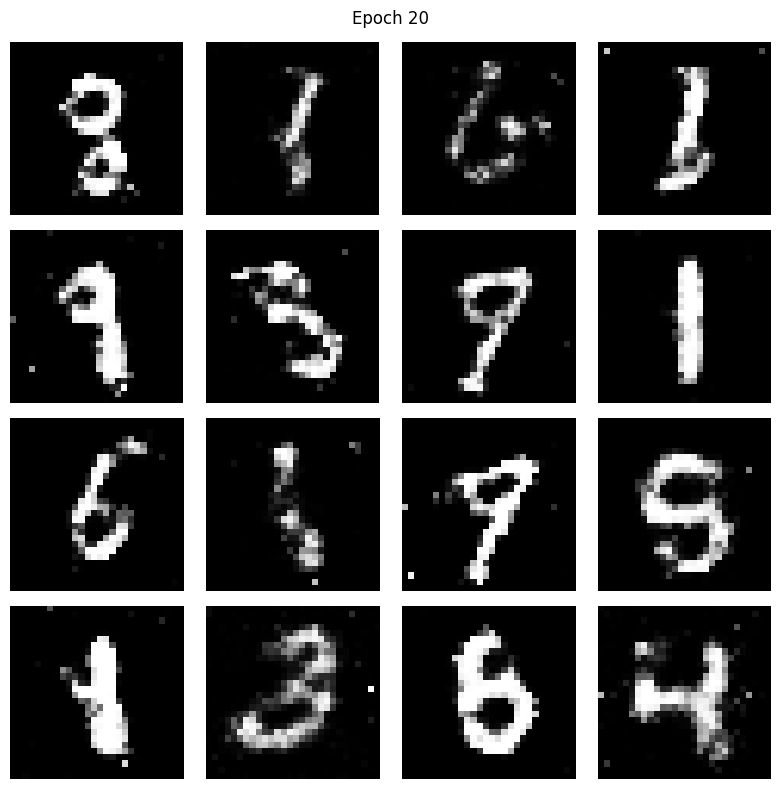

Epoch [20/50] Batch 0/938 D_loss: 1.3595 G_loss: 0.9193
Epoch [20/50] Batch 100/938 D_loss: 1.2676 G_loss: 0.8033
Epoch [20/50] Batch 200/938 D_loss: 1.2988 G_loss: 0.9518
Epoch [20/50] Batch 300/938 D_loss: 1.1870 G_loss: 0.8265
Epoch [20/50] Batch 400/938 D_loss: 1.3474 G_loss: 0.9848
Epoch [20/50] Batch 500/938 D_loss: 1.2718 G_loss: 0.8588
Epoch [20/50] Batch 600/938 D_loss: 1.2588 G_loss: 1.0312
Epoch [20/50] Batch 700/938 D_loss: 1.2764 G_loss: 0.9023
Epoch [20/50] Batch 800/938 D_loss: 1.3208 G_loss: 0.9479
Epoch [20/50] Batch 900/938 D_loss: 1.2521 G_loss: 0.9694


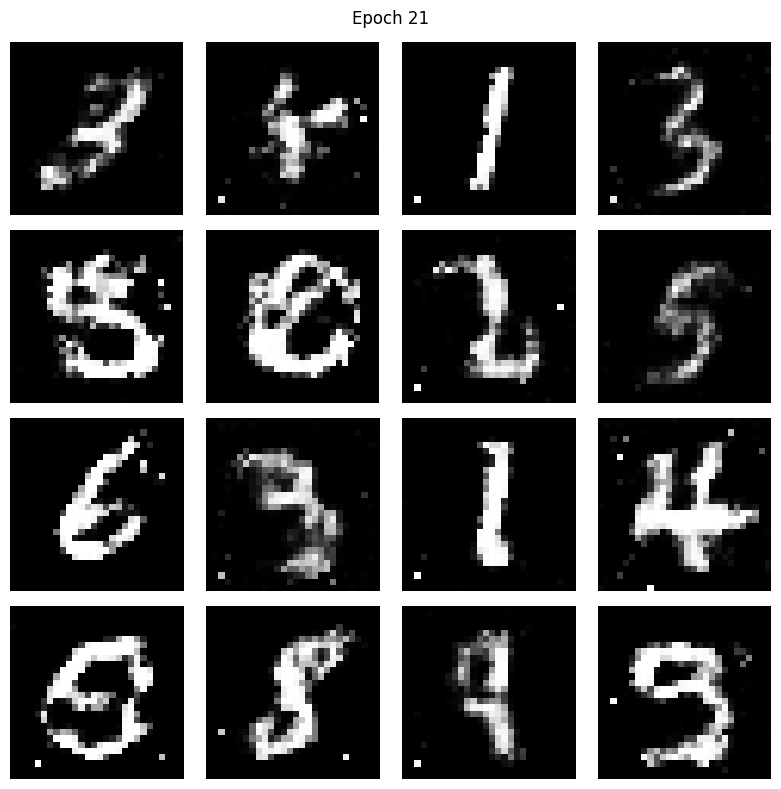

Epoch [21/50] Batch 0/938 D_loss: 1.3118 G_loss: 0.7683
Epoch [21/50] Batch 100/938 D_loss: 1.2406 G_loss: 0.9454
Epoch [21/50] Batch 200/938 D_loss: 1.2647 G_loss: 0.9432
Epoch [21/50] Batch 300/938 D_loss: 1.3439 G_loss: 0.9238
Epoch [21/50] Batch 400/938 D_loss: 1.1250 G_loss: 1.0131
Epoch [21/50] Batch 500/938 D_loss: 1.3172 G_loss: 0.9775
Epoch [21/50] Batch 600/938 D_loss: 1.3411 G_loss: 0.9126
Epoch [21/50] Batch 700/938 D_loss: 1.2115 G_loss: 0.8597
Epoch [21/50] Batch 800/938 D_loss: 1.3140 G_loss: 0.8559
Epoch [21/50] Batch 900/938 D_loss: 1.1839 G_loss: 1.0276


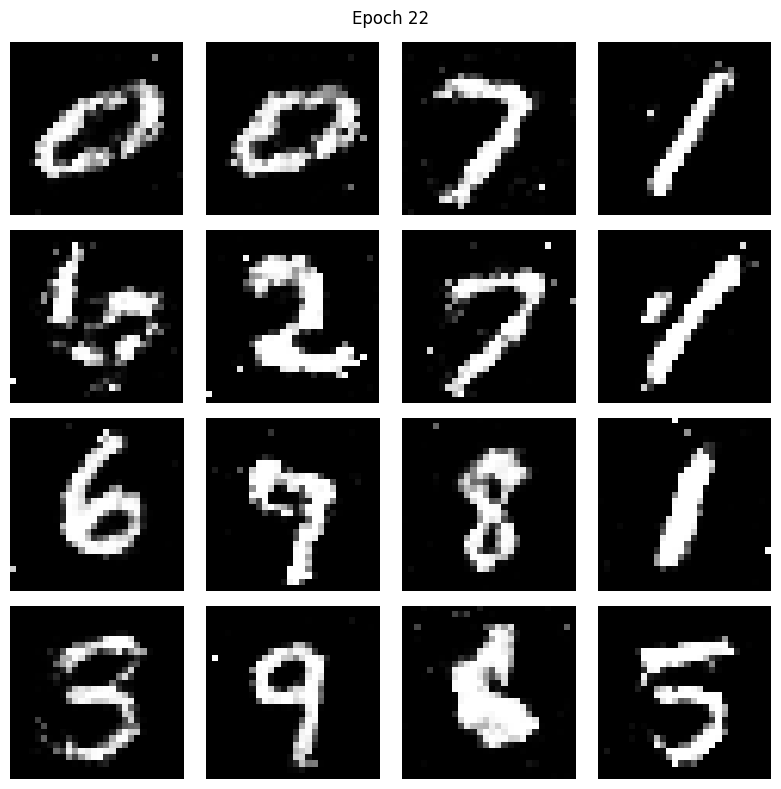

Epoch [22/50] Batch 0/938 D_loss: 1.3311 G_loss: 0.7652
Epoch [22/50] Batch 100/938 D_loss: 1.2443 G_loss: 0.8901
Epoch [22/50] Batch 200/938 D_loss: 1.2134 G_loss: 0.8513
Epoch [22/50] Batch 300/938 D_loss: 1.2841 G_loss: 0.9591
Epoch [22/50] Batch 400/938 D_loss: 1.2894 G_loss: 0.7732
Epoch [22/50] Batch 500/938 D_loss: 1.2748 G_loss: 0.8776
Epoch [22/50] Batch 600/938 D_loss: 1.2717 G_loss: 0.7945
Epoch [22/50] Batch 700/938 D_loss: 1.2948 G_loss: 1.0073
Epoch [22/50] Batch 800/938 D_loss: 1.3006 G_loss: 1.0281
Epoch [22/50] Batch 900/938 D_loss: 1.3315 G_loss: 1.0836


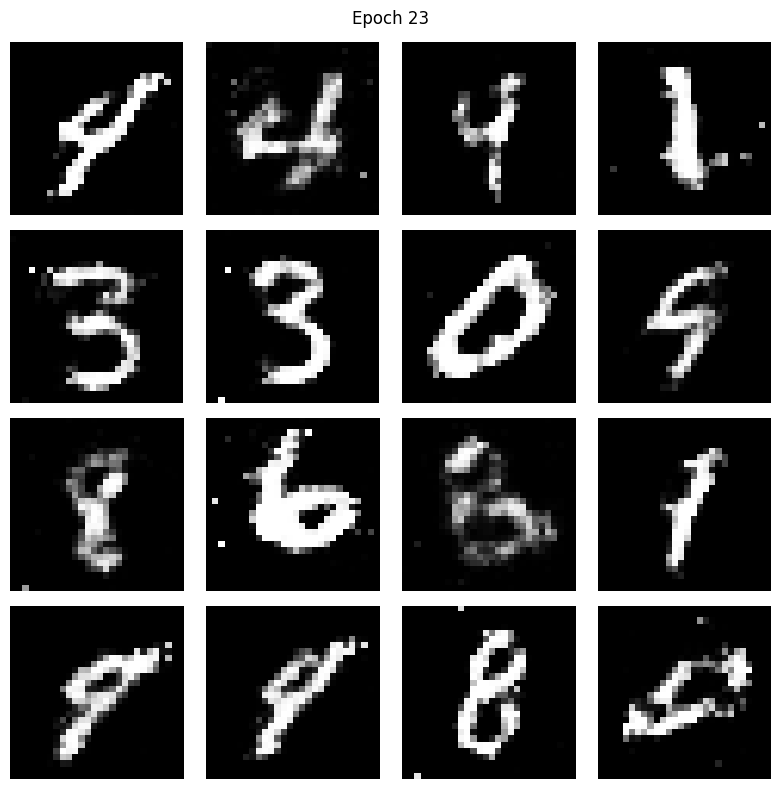

Epoch [23/50] Batch 0/938 D_loss: 1.2707 G_loss: 0.8119
Epoch [23/50] Batch 100/938 D_loss: 1.2889 G_loss: 0.9232
Epoch [23/50] Batch 200/938 D_loss: 1.2687 G_loss: 1.0217
Epoch [23/50] Batch 300/938 D_loss: 1.1783 G_loss: 0.8865
Epoch [23/50] Batch 400/938 D_loss: 1.3931 G_loss: 0.9026
Epoch [23/50] Batch 500/938 D_loss: 1.3348 G_loss: 0.8781
Epoch [23/50] Batch 600/938 D_loss: 1.2941 G_loss: 0.9251
Epoch [23/50] Batch 700/938 D_loss: 1.3362 G_loss: 0.9424
Epoch [23/50] Batch 800/938 D_loss: 1.4447 G_loss: 0.9237
Epoch [23/50] Batch 900/938 D_loss: 1.2740 G_loss: 0.7674


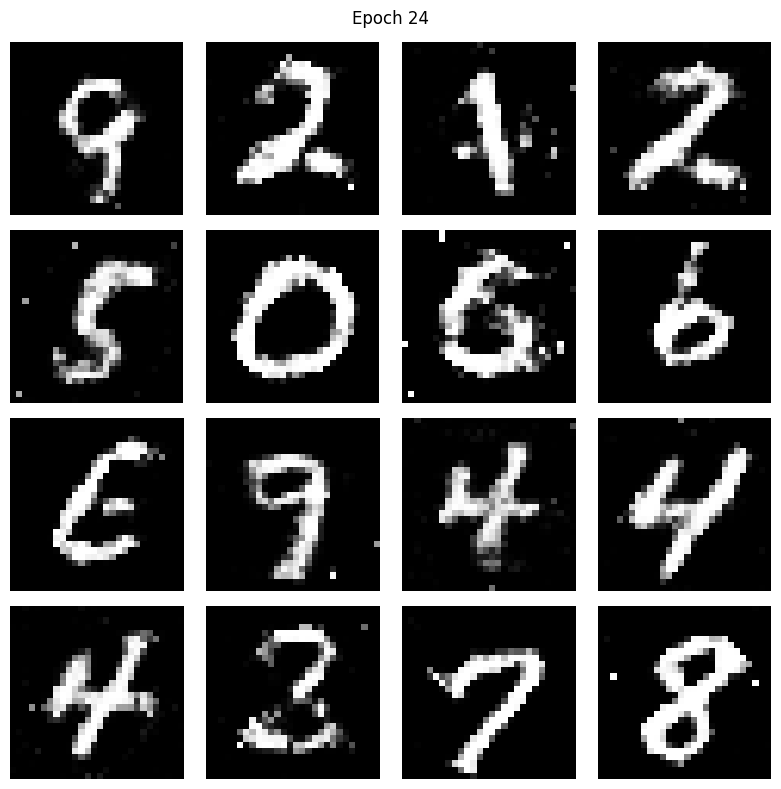

Epoch [24/50] Batch 0/938 D_loss: 1.2651 G_loss: 0.8891
Epoch [24/50] Batch 100/938 D_loss: 1.2183 G_loss: 0.8490
Epoch [24/50] Batch 200/938 D_loss: 1.2206 G_loss: 0.8031
Epoch [24/50] Batch 300/938 D_loss: 1.3931 G_loss: 1.1303
Epoch [24/50] Batch 400/938 D_loss: 1.2259 G_loss: 0.9702
Epoch [24/50] Batch 500/938 D_loss: 1.2070 G_loss: 1.0427
Epoch [24/50] Batch 600/938 D_loss: 1.1490 G_loss: 0.9999
Epoch [24/50] Batch 700/938 D_loss: 1.3259 G_loss: 0.9299
Epoch [24/50] Batch 800/938 D_loss: 1.2543 G_loss: 0.8195
Epoch [24/50] Batch 900/938 D_loss: 1.2566 G_loss: 0.8145


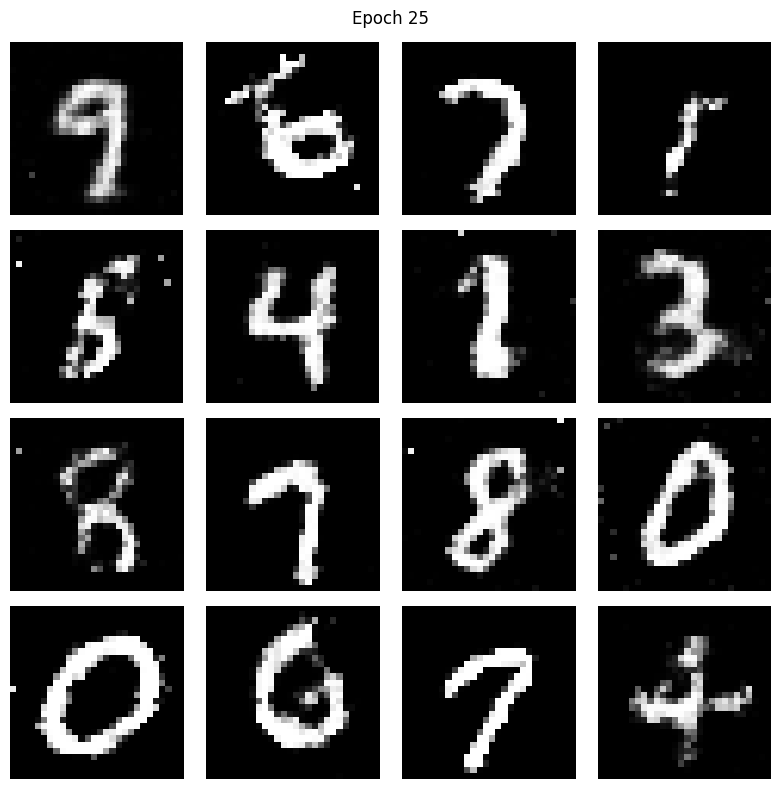

Epoch [25/50] Batch 0/938 D_loss: 1.3093 G_loss: 0.9104
Epoch [25/50] Batch 100/938 D_loss: 1.4716 G_loss: 0.9793
Epoch [25/50] Batch 200/938 D_loss: 1.2736 G_loss: 0.7461
Epoch [25/50] Batch 300/938 D_loss: 1.2858 G_loss: 0.9506
Epoch [25/50] Batch 400/938 D_loss: 1.3412 G_loss: 0.8138
Epoch [25/50] Batch 500/938 D_loss: 1.3457 G_loss: 0.8998
Epoch [25/50] Batch 600/938 D_loss: 1.2441 G_loss: 0.8884
Epoch [25/50] Batch 700/938 D_loss: 1.2905 G_loss: 0.9089
Epoch [25/50] Batch 800/938 D_loss: 1.2248 G_loss: 0.8108
Epoch [25/50] Batch 900/938 D_loss: 1.2817 G_loss: 0.9905


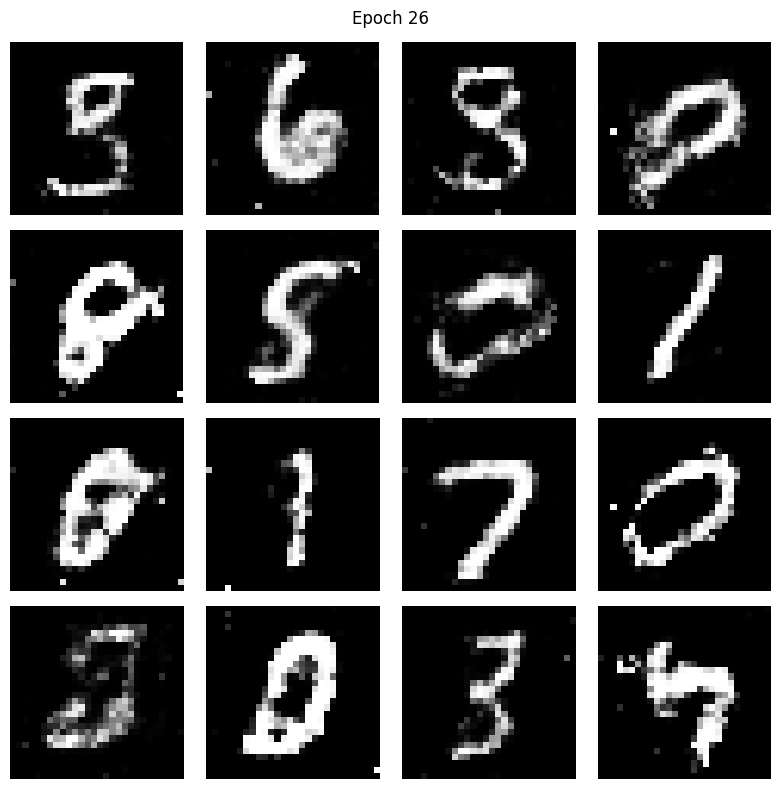

Epoch [26/50] Batch 0/938 D_loss: 1.2348 G_loss: 0.8459
Epoch [26/50] Batch 100/938 D_loss: 1.2918 G_loss: 0.7888
Epoch [26/50] Batch 200/938 D_loss: 1.3117 G_loss: 0.8961
Epoch [26/50] Batch 300/938 D_loss: 1.2296 G_loss: 0.8762
Epoch [26/50] Batch 400/938 D_loss: 1.2409 G_loss: 1.0229
Epoch [26/50] Batch 500/938 D_loss: 1.2027 G_loss: 0.8041
Epoch [26/50] Batch 600/938 D_loss: 1.2697 G_loss: 0.8685
Epoch [26/50] Batch 700/938 D_loss: 1.4292 G_loss: 0.9253
Epoch [26/50] Batch 800/938 D_loss: 1.2839 G_loss: 1.0056
Epoch [26/50] Batch 900/938 D_loss: 1.2801 G_loss: 0.8595


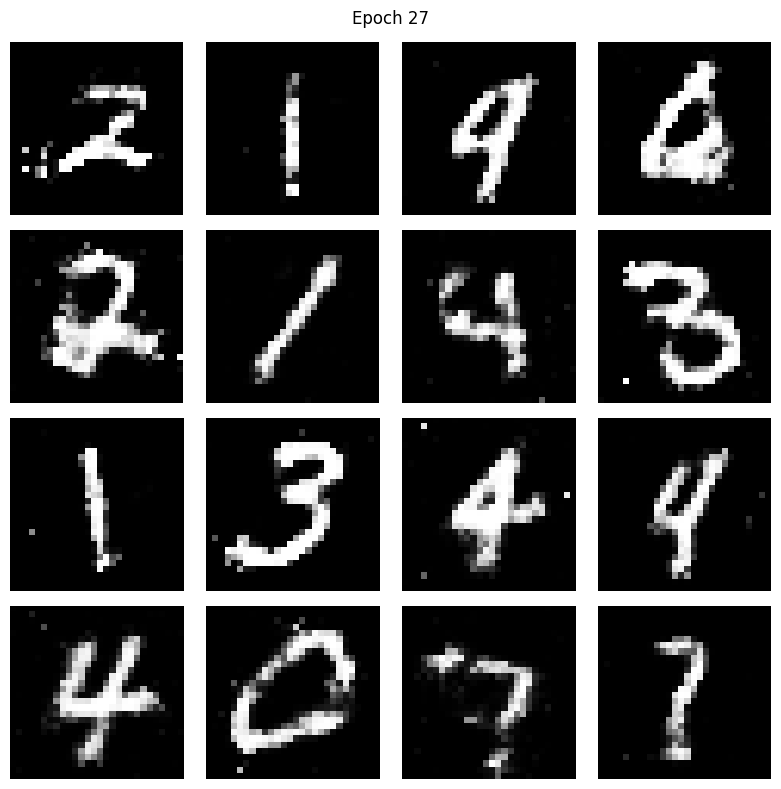

Epoch [27/50] Batch 0/938 D_loss: 1.2546 G_loss: 0.8979
Epoch [27/50] Batch 100/938 D_loss: 1.3006 G_loss: 0.7872
Epoch [27/50] Batch 200/938 D_loss: 1.2156 G_loss: 0.8896
Epoch [27/50] Batch 300/938 D_loss: 1.1825 G_loss: 0.9022
Epoch [27/50] Batch 400/938 D_loss: 1.3199 G_loss: 0.8766
Epoch [27/50] Batch 500/938 D_loss: 1.2139 G_loss: 0.7881
Epoch [27/50] Batch 600/938 D_loss: 1.2967 G_loss: 0.7566
Epoch [27/50] Batch 700/938 D_loss: 1.1620 G_loss: 0.9617
Epoch [27/50] Batch 800/938 D_loss: 1.3350 G_loss: 0.8911
Epoch [27/50] Batch 900/938 D_loss: 1.1996 G_loss: 0.8315


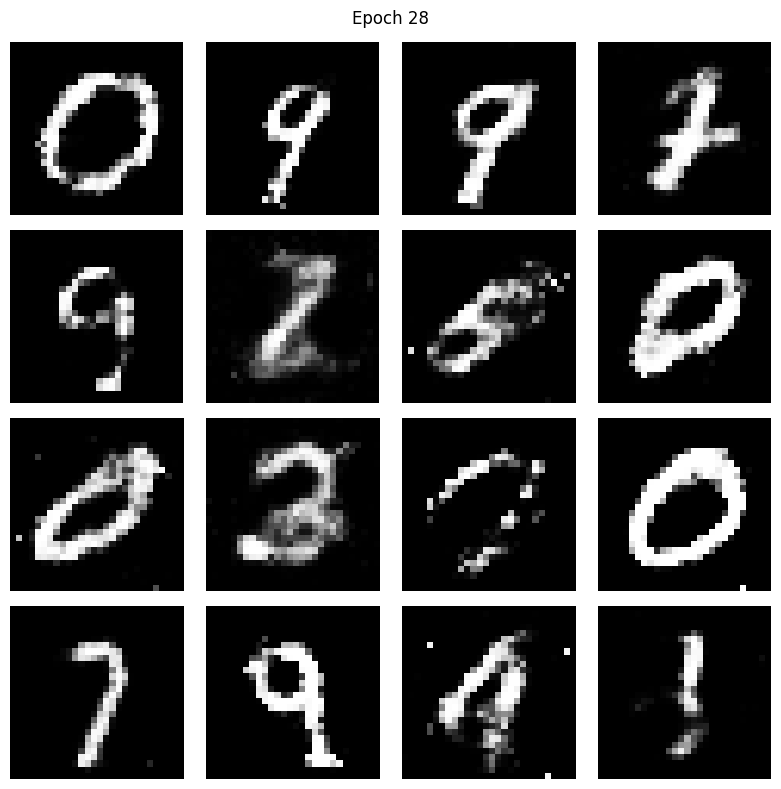

Epoch [28/50] Batch 0/938 D_loss: 1.2421 G_loss: 0.9004
Epoch [28/50] Batch 100/938 D_loss: 1.2013 G_loss: 0.8593
Epoch [28/50] Batch 200/938 D_loss: 1.2324 G_loss: 0.9005
Epoch [28/50] Batch 300/938 D_loss: 1.2028 G_loss: 0.8641
Epoch [28/50] Batch 400/938 D_loss: 1.2877 G_loss: 1.0004
Epoch [28/50] Batch 500/938 D_loss: 1.2720 G_loss: 1.0291
Epoch [28/50] Batch 600/938 D_loss: 1.2845 G_loss: 1.0006
Epoch [28/50] Batch 700/938 D_loss: 1.2787 G_loss: 1.0553
Epoch [28/50] Batch 800/938 D_loss: 1.2623 G_loss: 1.0261
Epoch [28/50] Batch 900/938 D_loss: 1.2493 G_loss: 0.9056


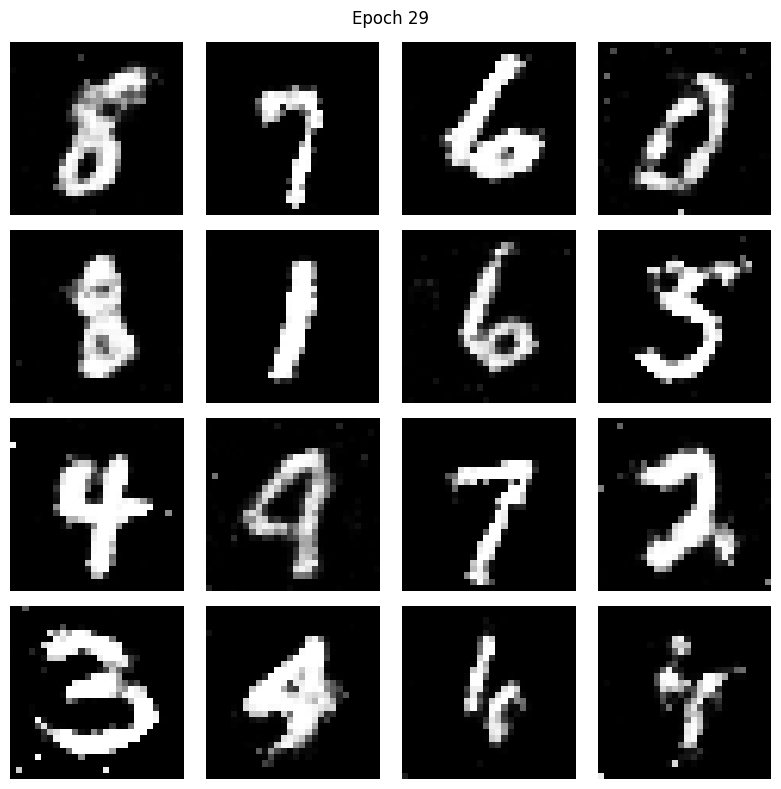

Epoch [29/50] Batch 0/938 D_loss: 1.3289 G_loss: 0.9080
Epoch [29/50] Batch 100/938 D_loss: 1.2907 G_loss: 0.7417
Epoch [29/50] Batch 200/938 D_loss: 1.2798 G_loss: 0.7075
Epoch [29/50] Batch 300/938 D_loss: 1.1990 G_loss: 0.7576
Epoch [29/50] Batch 400/938 D_loss: 1.2413 G_loss: 0.9319
Epoch [29/50] Batch 500/938 D_loss: 1.2668 G_loss: 0.8976
Epoch [29/50] Batch 600/938 D_loss: 1.2573 G_loss: 0.7298
Epoch [29/50] Batch 700/938 D_loss: 1.3306 G_loss: 0.9902
Epoch [29/50] Batch 800/938 D_loss: 1.2011 G_loss: 0.8940
Epoch [29/50] Batch 900/938 D_loss: 1.2093 G_loss: 0.8674


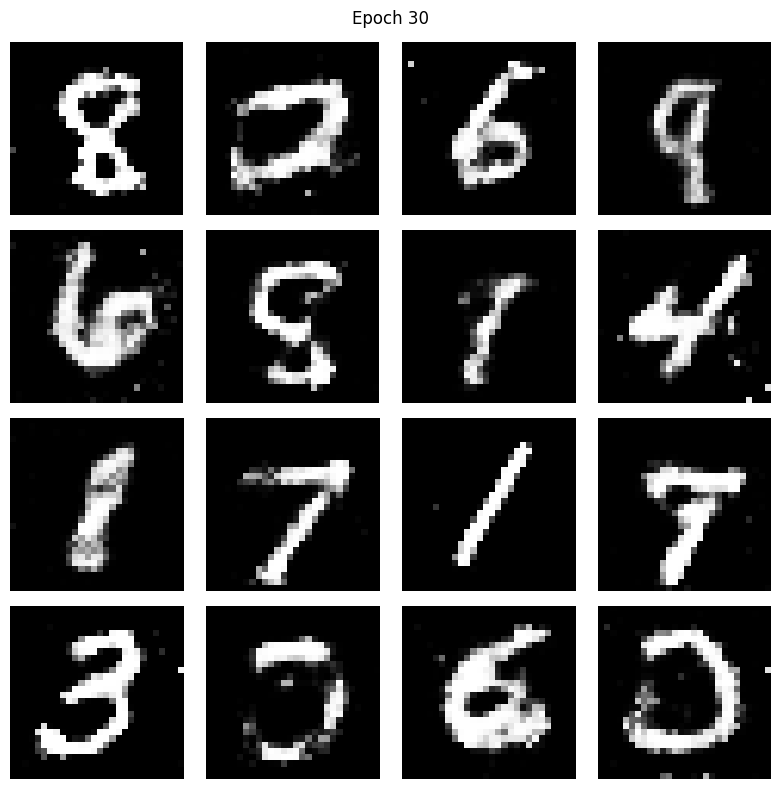

Epoch [30/50] Batch 0/938 D_loss: 1.2937 G_loss: 0.8705
Epoch [30/50] Batch 100/938 D_loss: 1.3035 G_loss: 0.8718
Epoch [30/50] Batch 200/938 D_loss: 1.2711 G_loss: 0.8830
Epoch [30/50] Batch 300/938 D_loss: 1.2181 G_loss: 0.9859
Epoch [30/50] Batch 400/938 D_loss: 1.3371 G_loss: 0.9816
Epoch [30/50] Batch 500/938 D_loss: 1.2886 G_loss: 0.7047
Epoch [30/50] Batch 600/938 D_loss: 1.2064 G_loss: 0.8578
Epoch [30/50] Batch 700/938 D_loss: 1.2408 G_loss: 0.9296
Epoch [30/50] Batch 800/938 D_loss: 1.1978 G_loss: 0.9323
Epoch [30/50] Batch 900/938 D_loss: 1.3559 G_loss: 0.9080


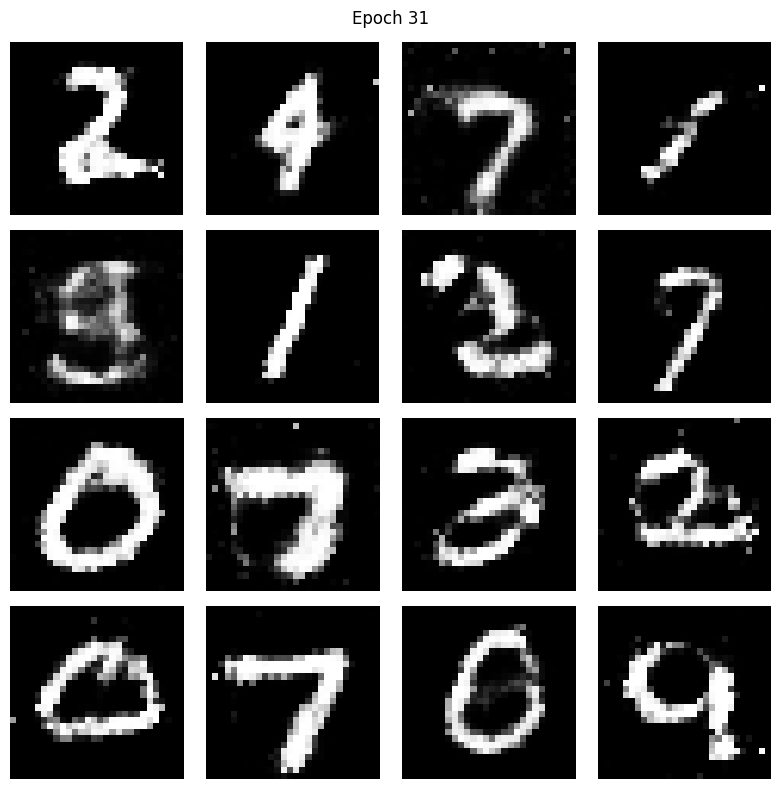

Epoch [31/50] Batch 0/938 D_loss: 1.2821 G_loss: 0.8875
Epoch [31/50] Batch 100/938 D_loss: 1.2907 G_loss: 1.0851
Epoch [31/50] Batch 200/938 D_loss: 1.2115 G_loss: 0.8167
Epoch [31/50] Batch 300/938 D_loss: 1.2699 G_loss: 0.7877
Epoch [31/50] Batch 400/938 D_loss: 1.3521 G_loss: 0.8764
Epoch [31/50] Batch 500/938 D_loss: 1.2789 G_loss: 0.8352
Epoch [31/50] Batch 600/938 D_loss: 1.1886 G_loss: 0.9823
Epoch [31/50] Batch 700/938 D_loss: 1.3902 G_loss: 0.8110
Epoch [31/50] Batch 800/938 D_loss: 1.2629 G_loss: 0.9579
Epoch [31/50] Batch 900/938 D_loss: 1.2725 G_loss: 0.8257


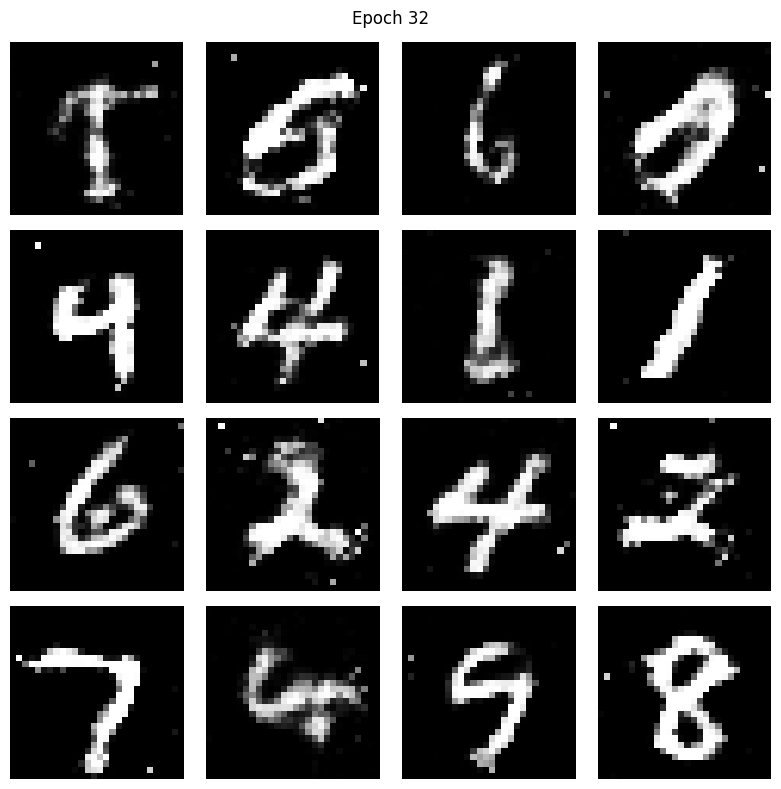

Epoch [32/50] Batch 0/938 D_loss: 1.3330 G_loss: 0.8717
Epoch [32/50] Batch 100/938 D_loss: 1.2592 G_loss: 0.8747
Epoch [32/50] Batch 200/938 D_loss: 1.2669 G_loss: 1.0803
Epoch [32/50] Batch 300/938 D_loss: 1.2793 G_loss: 0.8430
Epoch [32/50] Batch 400/938 D_loss: 1.3084 G_loss: 0.8691
Epoch [32/50] Batch 500/938 D_loss: 1.2719 G_loss: 0.7840
Epoch [32/50] Batch 600/938 D_loss: 1.3949 G_loss: 0.8380
Epoch [32/50] Batch 700/938 D_loss: 1.1779 G_loss: 0.8877
Epoch [32/50] Batch 800/938 D_loss: 1.3342 G_loss: 0.8075
Epoch [32/50] Batch 900/938 D_loss: 1.4053 G_loss: 0.9270


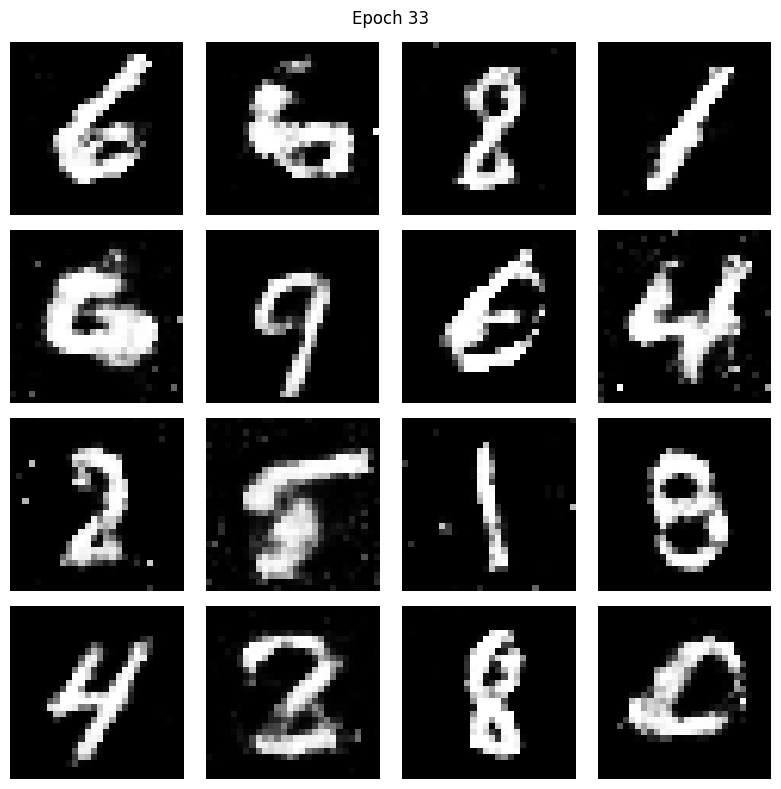

Epoch [33/50] Batch 0/938 D_loss: 1.4636 G_loss: 1.0586
Epoch [33/50] Batch 100/938 D_loss: 1.2678 G_loss: 0.9178
Epoch [33/50] Batch 200/938 D_loss: 1.2294 G_loss: 0.9590
Epoch [33/50] Batch 300/938 D_loss: 1.2263 G_loss: 0.8923
Epoch [33/50] Batch 400/938 D_loss: 1.3226 G_loss: 0.7852
Epoch [33/50] Batch 500/938 D_loss: 1.3093 G_loss: 0.8665
Epoch [33/50] Batch 600/938 D_loss: 1.2870 G_loss: 0.8899
Epoch [33/50] Batch 700/938 D_loss: 1.3221 G_loss: 0.9159
Epoch [33/50] Batch 800/938 D_loss: 1.3618 G_loss: 0.9134
Epoch [33/50] Batch 900/938 D_loss: 1.3581 G_loss: 0.9355


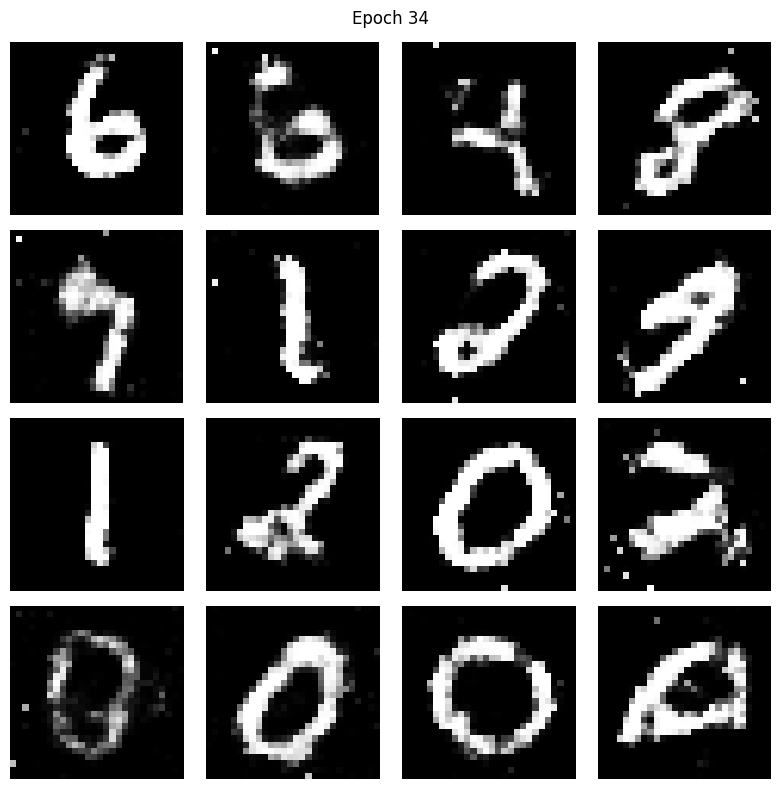

Epoch [34/50] Batch 0/938 D_loss: 1.2917 G_loss: 0.9638
Epoch [34/50] Batch 100/938 D_loss: 1.2828 G_loss: 0.8567
Epoch [34/50] Batch 200/938 D_loss: 1.2870 G_loss: 0.7400
Epoch [34/50] Batch 300/938 D_loss: 1.2882 G_loss: 0.6667
Epoch [34/50] Batch 400/938 D_loss: 1.2521 G_loss: 0.8000
Epoch [34/50] Batch 500/938 D_loss: 1.2696 G_loss: 0.9231
Epoch [34/50] Batch 600/938 D_loss: 1.2951 G_loss: 0.9759
Epoch [34/50] Batch 700/938 D_loss: 1.1385 G_loss: 0.9142
Epoch [34/50] Batch 800/938 D_loss: 1.2582 G_loss: 0.8578
Epoch [34/50] Batch 900/938 D_loss: 1.3050 G_loss: 0.7754


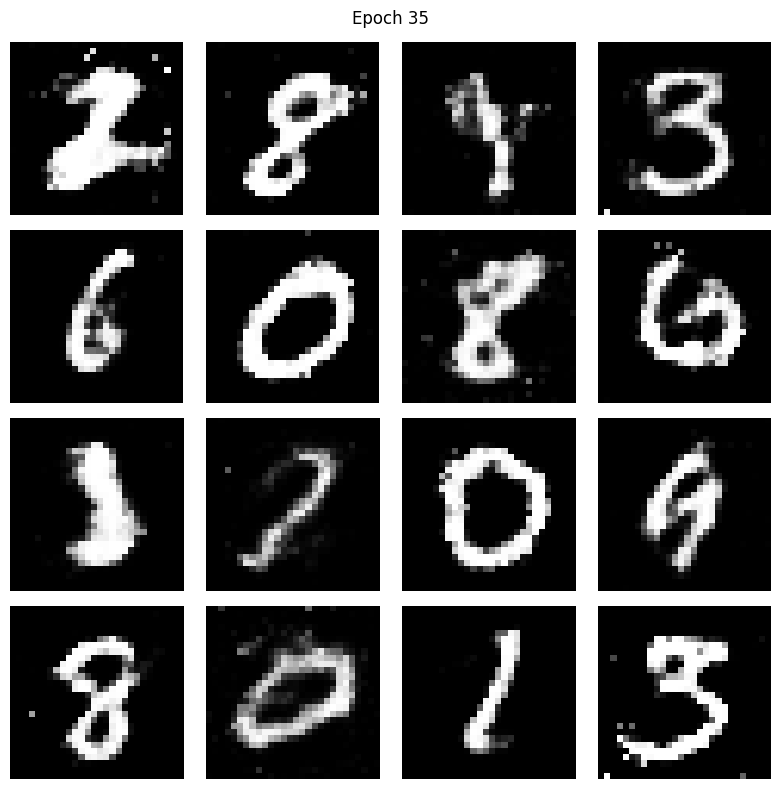

Epoch [35/50] Batch 0/938 D_loss: 1.3872 G_loss: 0.9042
Epoch [35/50] Batch 100/938 D_loss: 1.2293 G_loss: 0.8348
Epoch [35/50] Batch 200/938 D_loss: 1.3188 G_loss: 0.8810
Epoch [35/50] Batch 300/938 D_loss: 1.2475 G_loss: 0.9491
Epoch [35/50] Batch 400/938 D_loss: 1.3219 G_loss: 0.8015
Epoch [35/50] Batch 500/938 D_loss: 1.2893 G_loss: 0.7251
Epoch [35/50] Batch 600/938 D_loss: 1.3305 G_loss: 0.9436
Epoch [35/50] Batch 700/938 D_loss: 1.4222 G_loss: 0.7825
Epoch [35/50] Batch 800/938 D_loss: 1.3373 G_loss: 0.9165
Epoch [35/50] Batch 900/938 D_loss: 1.2847 G_loss: 0.9886


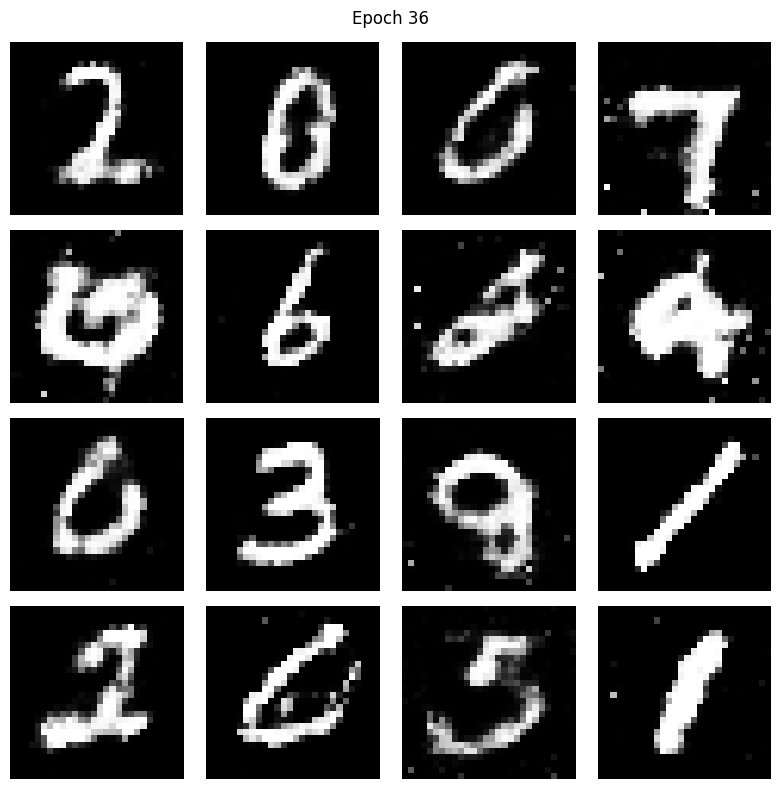

Epoch [36/50] Batch 0/938 D_loss: 1.2310 G_loss: 0.8701
Epoch [36/50] Batch 100/938 D_loss: 1.2703 G_loss: 0.8863
Epoch [36/50] Batch 200/938 D_loss: 1.2943 G_loss: 0.8509
Epoch [36/50] Batch 300/938 D_loss: 1.2707 G_loss: 0.9055
Epoch [36/50] Batch 400/938 D_loss: 1.3109 G_loss: 0.8632
Epoch [36/50] Batch 500/938 D_loss: 1.2689 G_loss: 0.8667
Epoch [36/50] Batch 600/938 D_loss: 1.2973 G_loss: 0.8492
Epoch [36/50] Batch 700/938 D_loss: 1.2828 G_loss: 0.8659
Epoch [36/50] Batch 800/938 D_loss: 1.2634 G_loss: 0.7802
Epoch [36/50] Batch 900/938 D_loss: 1.3369 G_loss: 0.8662


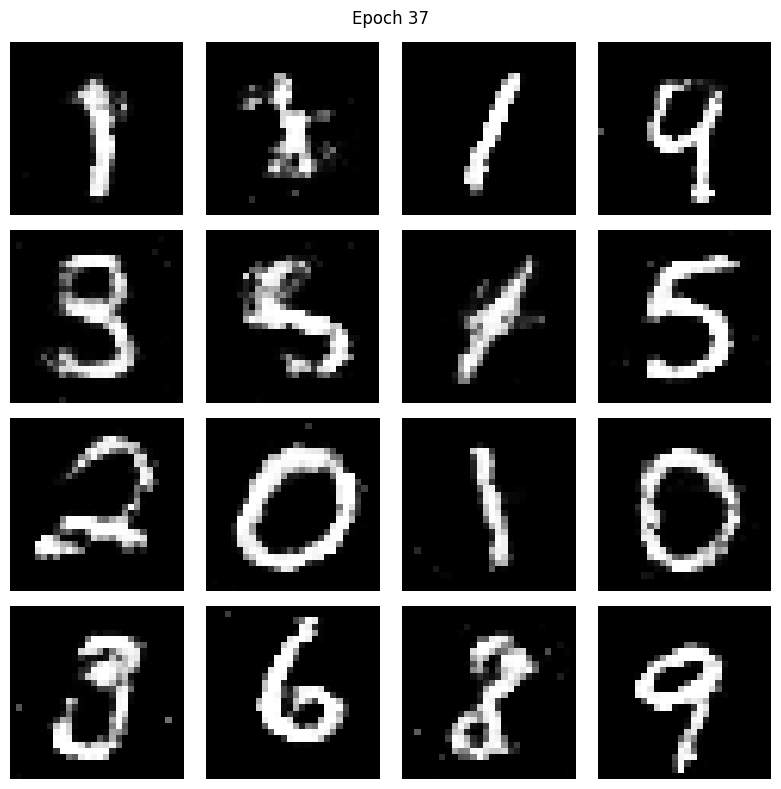

Epoch [37/50] Batch 0/938 D_loss: 1.3499 G_loss: 0.7623
Epoch [37/50] Batch 100/938 D_loss: 1.4124 G_loss: 0.8669
Epoch [37/50] Batch 200/938 D_loss: 1.3138 G_loss: 0.9374
Epoch [37/50] Batch 300/938 D_loss: 1.2695 G_loss: 0.8609
Epoch [37/50] Batch 400/938 D_loss: 1.3596 G_loss: 1.0264
Epoch [37/50] Batch 500/938 D_loss: 1.3095 G_loss: 0.8757
Epoch [37/50] Batch 600/938 D_loss: 1.2940 G_loss: 0.9230
Epoch [37/50] Batch 700/938 D_loss: 1.2511 G_loss: 0.9520
Epoch [37/50] Batch 800/938 D_loss: 1.3061 G_loss: 0.8707
Epoch [37/50] Batch 900/938 D_loss: 1.3032 G_loss: 0.7578


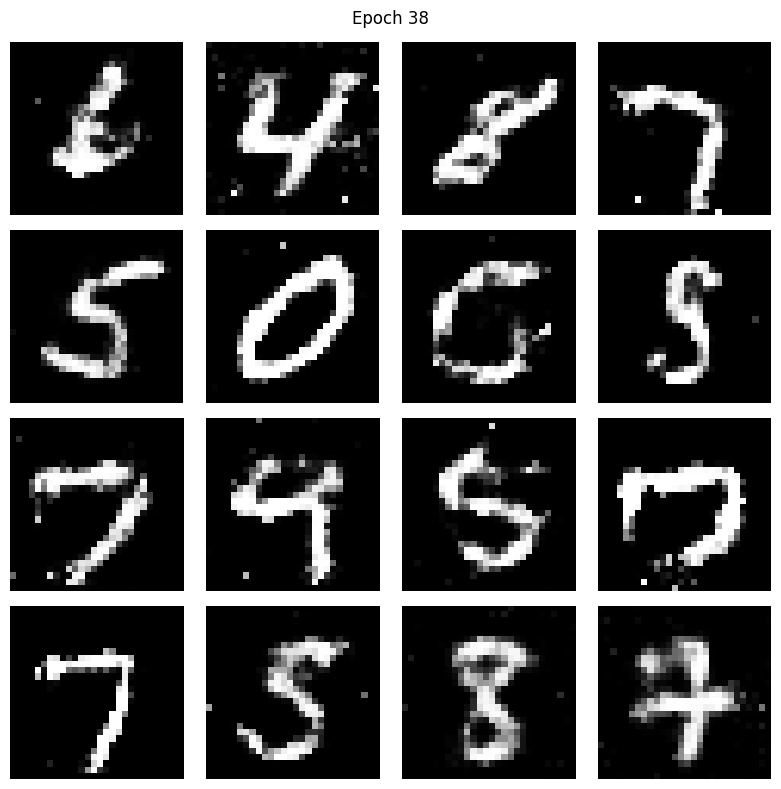

Epoch [38/50] Batch 0/938 D_loss: 1.3361 G_loss: 0.8602
Epoch [38/50] Batch 100/938 D_loss: 1.3375 G_loss: 0.9457
Epoch [38/50] Batch 200/938 D_loss: 1.3638 G_loss: 0.7638
Epoch [38/50] Batch 300/938 D_loss: 1.2099 G_loss: 0.9183
Epoch [38/50] Batch 400/938 D_loss: 1.3603 G_loss: 0.7936
Epoch [38/50] Batch 500/938 D_loss: 1.2134 G_loss: 0.9640
Epoch [38/50] Batch 600/938 D_loss: 1.3244 G_loss: 0.8639
Epoch [38/50] Batch 700/938 D_loss: 1.3266 G_loss: 0.8859
Epoch [38/50] Batch 800/938 D_loss: 1.2957 G_loss: 0.9215
Epoch [38/50] Batch 900/938 D_loss: 1.3162 G_loss: 0.8441


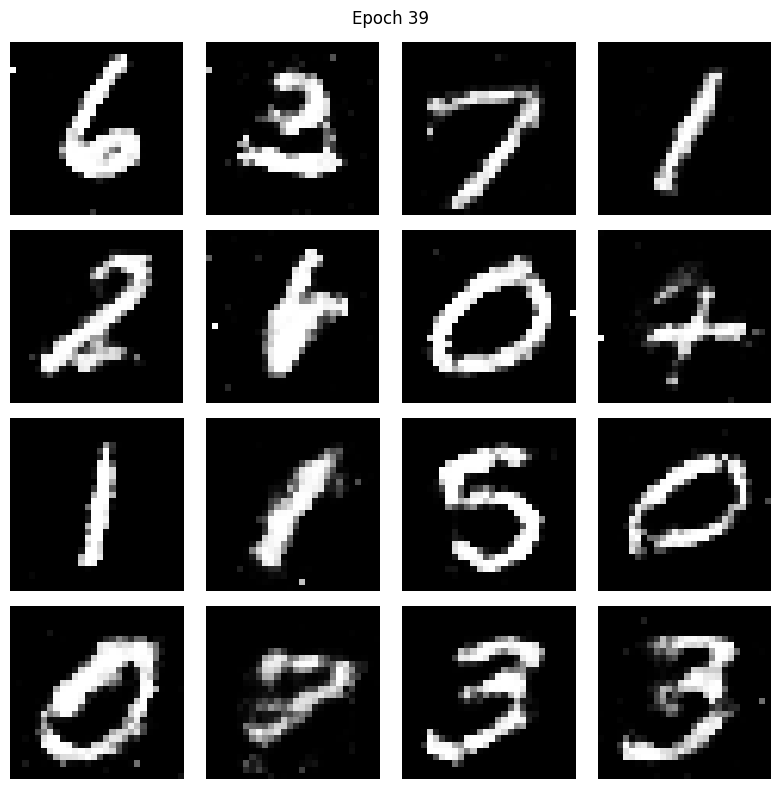

Epoch [39/50] Batch 0/938 D_loss: 1.2952 G_loss: 0.8735
Epoch [39/50] Batch 100/938 D_loss: 1.2873 G_loss: 0.8592
Epoch [39/50] Batch 200/938 D_loss: 1.3349 G_loss: 0.7859
Epoch [39/50] Batch 300/938 D_loss: 1.3182 G_loss: 1.0423
Epoch [39/50] Batch 400/938 D_loss: 1.2022 G_loss: 0.9402
Epoch [39/50] Batch 500/938 D_loss: 1.3387 G_loss: 0.7816
Epoch [39/50] Batch 600/938 D_loss: 1.3667 G_loss: 0.8605
Epoch [39/50] Batch 700/938 D_loss: 1.3692 G_loss: 0.7872
Epoch [39/50] Batch 800/938 D_loss: 1.2038 G_loss: 0.7884
Epoch [39/50] Batch 900/938 D_loss: 1.2389 G_loss: 0.9616


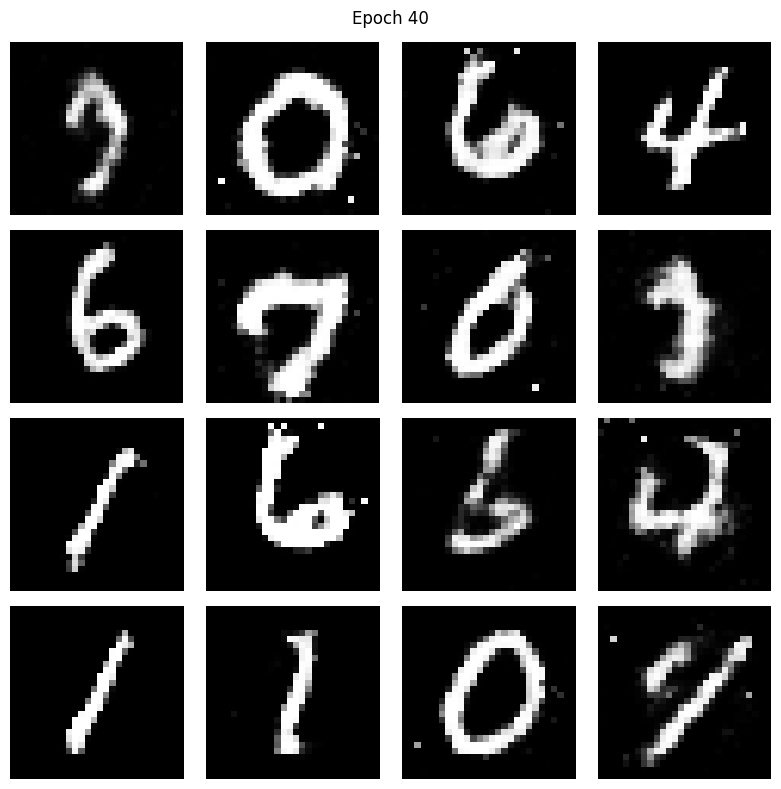

Epoch [40/50] Batch 0/938 D_loss: 1.3196 G_loss: 0.8030
Epoch [40/50] Batch 100/938 D_loss: 1.3546 G_loss: 0.8838
Epoch [40/50] Batch 200/938 D_loss: 1.3106 G_loss: 1.0400
Epoch [40/50] Batch 300/938 D_loss: 1.3524 G_loss: 0.8649
Epoch [40/50] Batch 400/938 D_loss: 1.2779 G_loss: 0.7882
Epoch [40/50] Batch 500/938 D_loss: 1.3429 G_loss: 0.8117
Epoch [40/50] Batch 600/938 D_loss: 1.2509 G_loss: 0.8806
Epoch [40/50] Batch 700/938 D_loss: 1.3413 G_loss: 0.8894
Epoch [40/50] Batch 800/938 D_loss: 1.3516 G_loss: 0.7469
Epoch [40/50] Batch 900/938 D_loss: 1.3209 G_loss: 0.9055


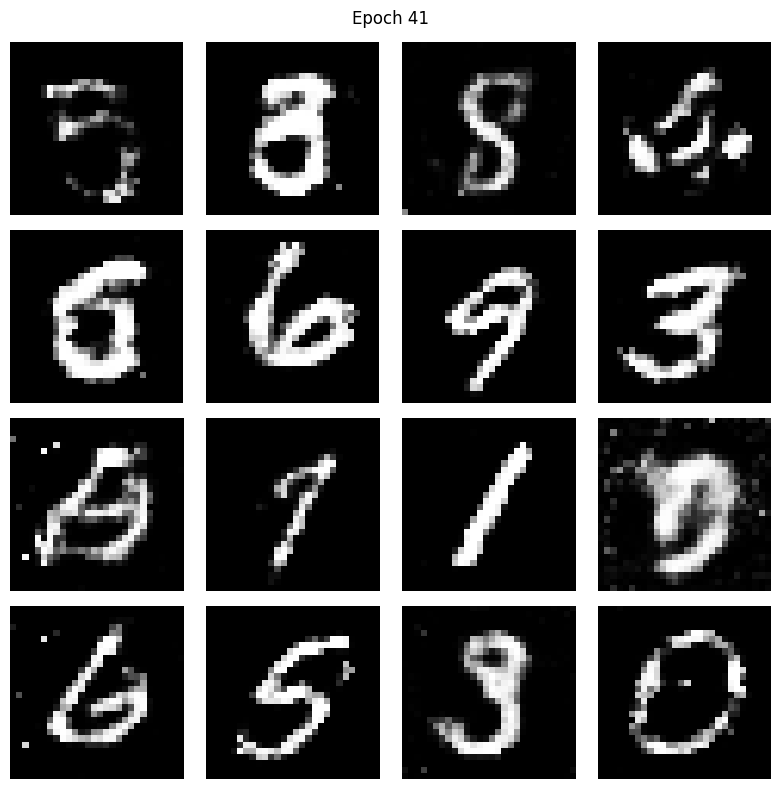

Epoch [41/50] Batch 0/938 D_loss: 1.3673 G_loss: 0.9134
Epoch [41/50] Batch 100/938 D_loss: 1.2887 G_loss: 0.8392
Epoch [41/50] Batch 200/938 D_loss: 1.3775 G_loss: 0.9356
Epoch [41/50] Batch 300/938 D_loss: 1.3495 G_loss: 0.8022
Epoch [41/50] Batch 400/938 D_loss: 1.3541 G_loss: 0.7512
Epoch [41/50] Batch 500/938 D_loss: 1.2299 G_loss: 0.8988
Epoch [41/50] Batch 600/938 D_loss: 1.1779 G_loss: 0.8139
Epoch [41/50] Batch 700/938 D_loss: 1.2498 G_loss: 0.8563
Epoch [41/50] Batch 800/938 D_loss: 1.3074 G_loss: 0.9106
Epoch [41/50] Batch 900/938 D_loss: 1.2289 G_loss: 0.7345


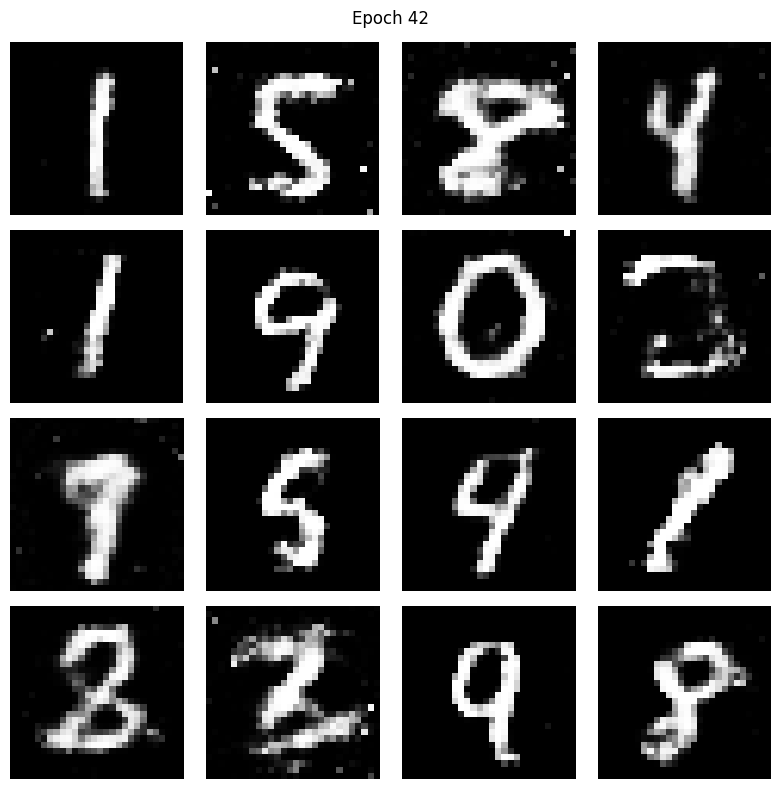

Epoch [42/50] Batch 0/938 D_loss: 1.3325 G_loss: 0.8052
Epoch [42/50] Batch 100/938 D_loss: 1.2994 G_loss: 0.9275
Epoch [42/50] Batch 200/938 D_loss: 1.2814 G_loss: 0.8921
Epoch [42/50] Batch 300/938 D_loss: 1.3380 G_loss: 0.8805
Epoch [42/50] Batch 400/938 D_loss: 1.3200 G_loss: 0.8264
Epoch [42/50] Batch 500/938 D_loss: 1.2635 G_loss: 0.8329
Epoch [42/50] Batch 600/938 D_loss: 1.2965 G_loss: 0.9072
Epoch [42/50] Batch 700/938 D_loss: 1.2585 G_loss: 0.8235
Epoch [42/50] Batch 800/938 D_loss: 1.3815 G_loss: 0.7780
Epoch [42/50] Batch 900/938 D_loss: 1.2935 G_loss: 0.8842


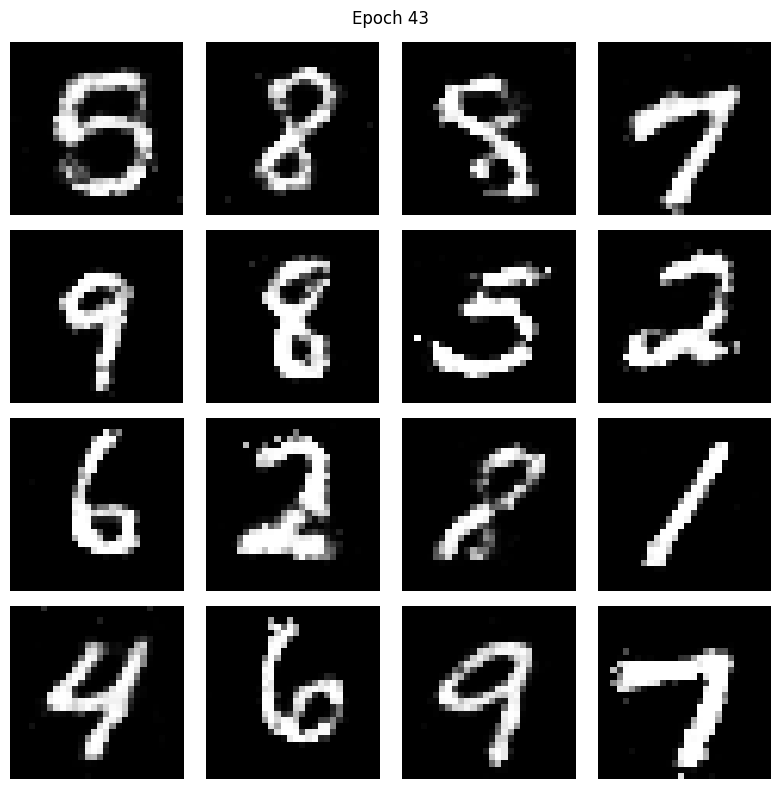

Epoch [43/50] Batch 0/938 D_loss: 1.2853 G_loss: 0.8756
Epoch [43/50] Batch 100/938 D_loss: 1.2678 G_loss: 0.8900
Epoch [43/50] Batch 200/938 D_loss: 1.3722 G_loss: 0.7957
Epoch [43/50] Batch 300/938 D_loss: 1.2780 G_loss: 0.7733
Epoch [43/50] Batch 400/938 D_loss: 1.2626 G_loss: 0.8379
Epoch [43/50] Batch 500/938 D_loss: 1.2651 G_loss: 0.8231
Epoch [43/50] Batch 600/938 D_loss: 1.2949 G_loss: 0.7118
Epoch [43/50] Batch 700/938 D_loss: 1.2531 G_loss: 0.7669
Epoch [43/50] Batch 800/938 D_loss: 1.2937 G_loss: 0.7179
Epoch [43/50] Batch 900/938 D_loss: 1.2494 G_loss: 0.8935


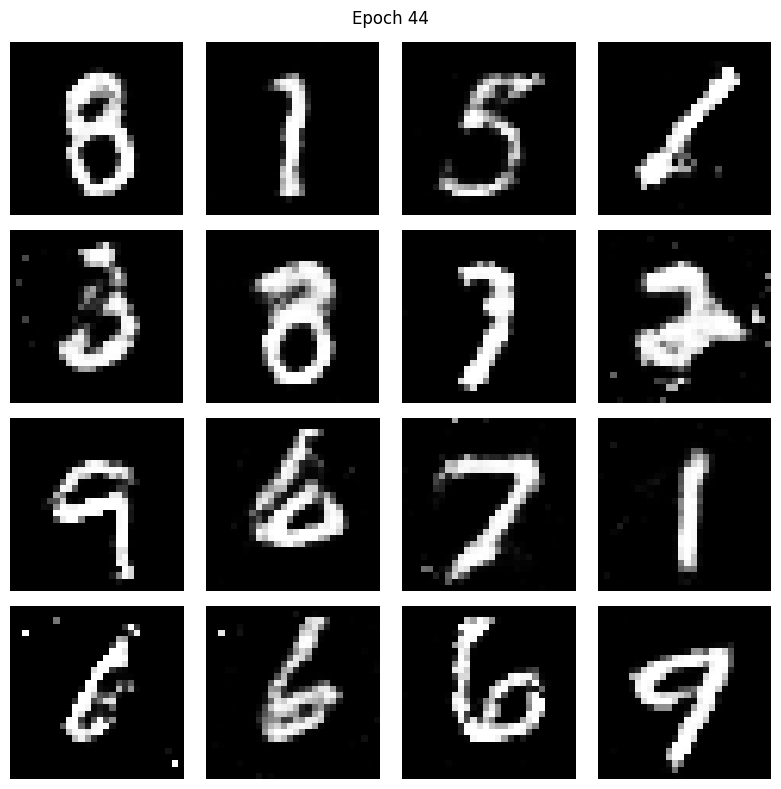

Epoch [44/50] Batch 0/938 D_loss: 1.2230 G_loss: 0.8725
Epoch [44/50] Batch 100/938 D_loss: 1.3420 G_loss: 0.8517
Epoch [44/50] Batch 200/938 D_loss: 1.3616 G_loss: 0.8679
Epoch [44/50] Batch 300/938 D_loss: 1.2757 G_loss: 0.9288
Epoch [44/50] Batch 400/938 D_loss: 1.2494 G_loss: 0.8854
Epoch [44/50] Batch 500/938 D_loss: 1.3083 G_loss: 0.8327
Epoch [44/50] Batch 600/938 D_loss: 1.3856 G_loss: 0.8350
Epoch [44/50] Batch 700/938 D_loss: 1.3867 G_loss: 0.9296
Epoch [44/50] Batch 800/938 D_loss: 1.2468 G_loss: 0.9100
Epoch [44/50] Batch 900/938 D_loss: 1.3625 G_loss: 0.8812


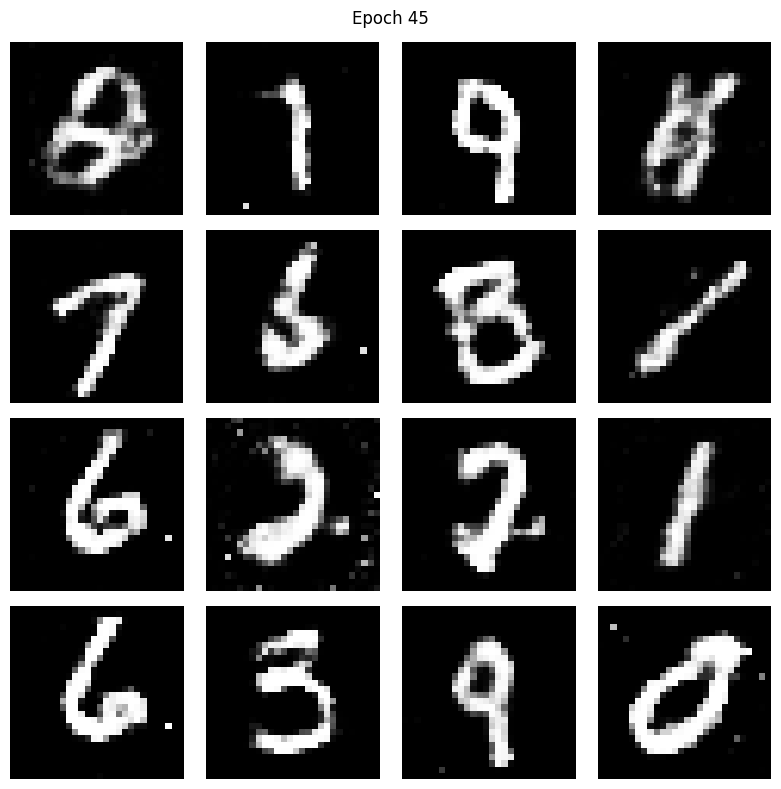

Epoch [45/50] Batch 0/938 D_loss: 1.2151 G_loss: 0.9015
Epoch [45/50] Batch 100/938 D_loss: 1.3438 G_loss: 0.7526
Epoch [45/50] Batch 200/938 D_loss: 1.3164 G_loss: 0.7921
Epoch [45/50] Batch 300/938 D_loss: 1.2648 G_loss: 0.8496
Epoch [45/50] Batch 400/938 D_loss: 1.2775 G_loss: 0.9291
Epoch [45/50] Batch 500/938 D_loss: 1.2368 G_loss: 0.8812
Epoch [45/50] Batch 600/938 D_loss: 1.1975 G_loss: 0.8327
Epoch [45/50] Batch 700/938 D_loss: 1.3435 G_loss: 0.8404
Epoch [45/50] Batch 800/938 D_loss: 1.2914 G_loss: 0.8003
Epoch [45/50] Batch 900/938 D_loss: 1.2830 G_loss: 0.8604


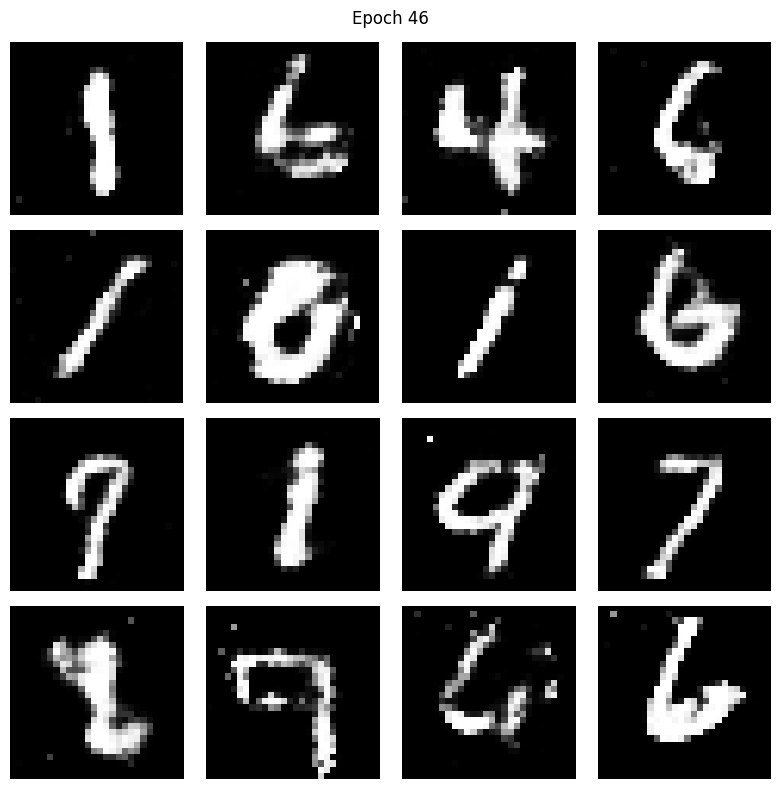

Epoch [46/50] Batch 0/938 D_loss: 1.3081 G_loss: 0.9205
Epoch [46/50] Batch 100/938 D_loss: 1.2563 G_loss: 0.9016
Epoch [46/50] Batch 200/938 D_loss: 1.3537 G_loss: 0.8413
Epoch [46/50] Batch 300/938 D_loss: 1.3078 G_loss: 0.8737
Epoch [46/50] Batch 400/938 D_loss: 1.3120 G_loss: 0.8126
Epoch [46/50] Batch 500/938 D_loss: 1.3014 G_loss: 0.8221
Epoch [46/50] Batch 600/938 D_loss: 1.3195 G_loss: 0.9775
Epoch [46/50] Batch 700/938 D_loss: 1.2353 G_loss: 0.9452
Epoch [46/50] Batch 800/938 D_loss: 1.3888 G_loss: 0.9541
Epoch [46/50] Batch 900/938 D_loss: 1.3069 G_loss: 0.8225


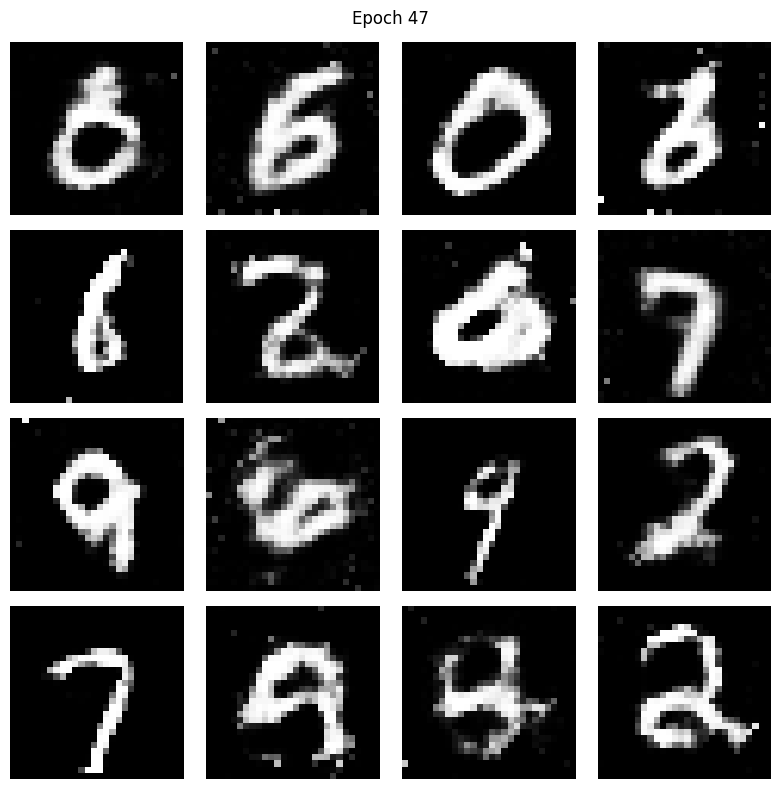

Epoch [47/50] Batch 0/938 D_loss: 1.2909 G_loss: 0.7047
Epoch [47/50] Batch 100/938 D_loss: 1.3413 G_loss: 0.7014
Epoch [47/50] Batch 200/938 D_loss: 1.2576 G_loss: 0.8257
Epoch [47/50] Batch 300/938 D_loss: 1.2124 G_loss: 0.8236
Epoch [47/50] Batch 400/938 D_loss: 1.3627 G_loss: 0.7933
Epoch [47/50] Batch 500/938 D_loss: 1.3511 G_loss: 0.8166
Epoch [47/50] Batch 600/938 D_loss: 1.2119 G_loss: 0.8405
Epoch [47/50] Batch 700/938 D_loss: 1.3213 G_loss: 0.8123
Epoch [47/50] Batch 800/938 D_loss: 1.3787 G_loss: 0.8795
Epoch [47/50] Batch 900/938 D_loss: 1.2910 G_loss: 0.9352


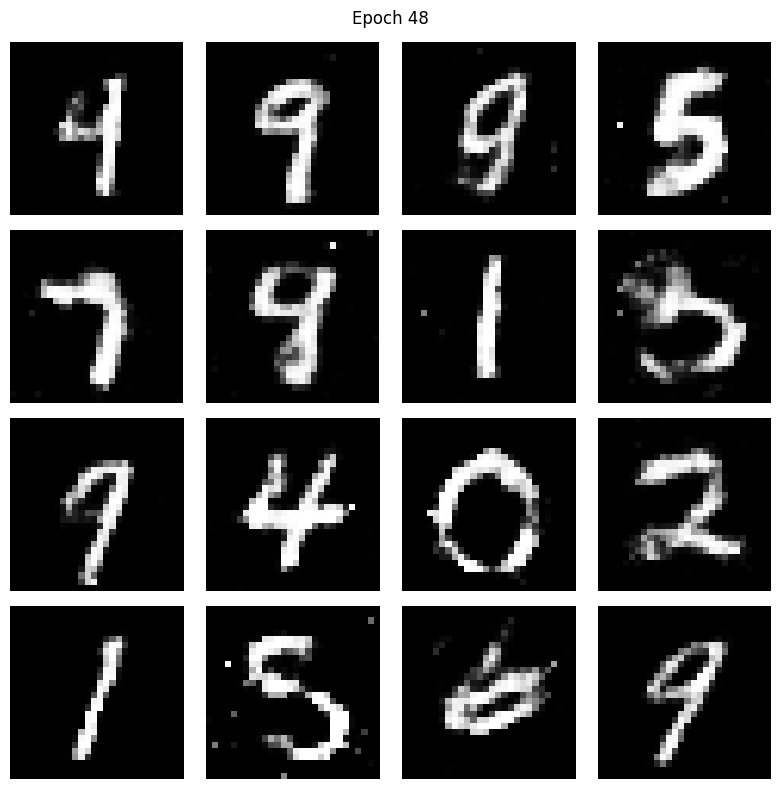

Epoch [48/50] Batch 0/938 D_loss: 1.3143 G_loss: 0.9407
Epoch [48/50] Batch 100/938 D_loss: 1.3279 G_loss: 0.8877
Epoch [48/50] Batch 200/938 D_loss: 1.2836 G_loss: 0.7585
Epoch [48/50] Batch 300/938 D_loss: 1.3800 G_loss: 0.8243
Epoch [48/50] Batch 400/938 D_loss: 1.2960 G_loss: 0.9152
Epoch [48/50] Batch 500/938 D_loss: 1.3047 G_loss: 0.9677
Epoch [48/50] Batch 600/938 D_loss: 1.2984 G_loss: 0.8925
Epoch [48/50] Batch 700/938 D_loss: 1.2479 G_loss: 0.9477
Epoch [48/50] Batch 800/938 D_loss: 1.2492 G_loss: 0.8527
Epoch [48/50] Batch 900/938 D_loss: 1.3446 G_loss: 0.7702


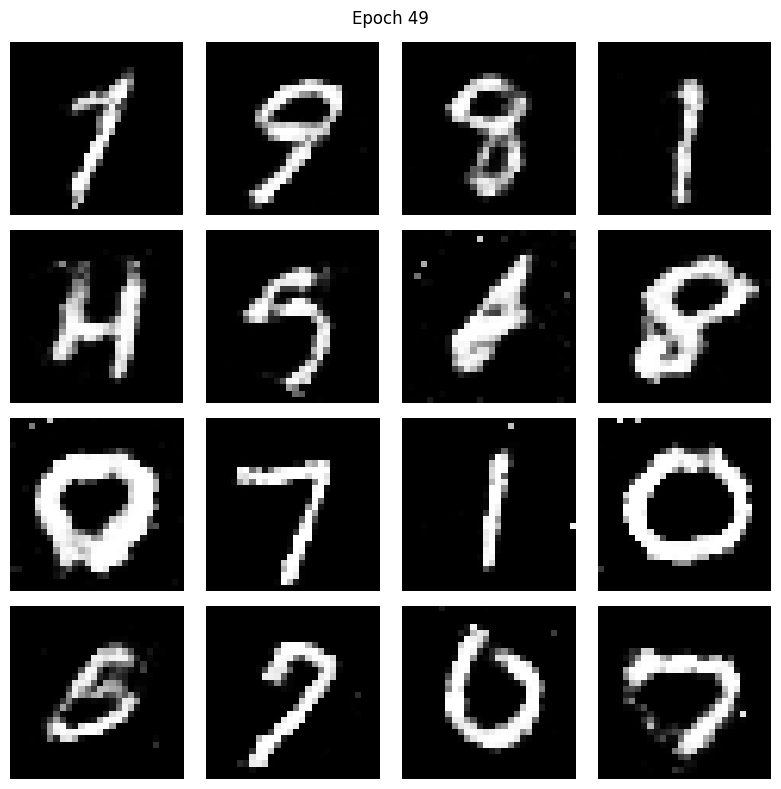

Epoch [49/50] Batch 0/938 D_loss: 1.3891 G_loss: 0.9657
Epoch [49/50] Batch 100/938 D_loss: 1.3042 G_loss: 0.8566
Epoch [49/50] Batch 200/938 D_loss: 1.1974 G_loss: 0.8317
Epoch [49/50] Batch 300/938 D_loss: 1.3231 G_loss: 0.7271
Epoch [49/50] Batch 400/938 D_loss: 1.2947 G_loss: 0.9205
Epoch [49/50] Batch 500/938 D_loss: 1.2617 G_loss: 0.8200
Epoch [49/50] Batch 600/938 D_loss: 1.3463 G_loss: 0.8479
Epoch [49/50] Batch 700/938 D_loss: 1.4126 G_loss: 0.7778
Epoch [49/50] Batch 800/938 D_loss: 1.3035 G_loss: 0.7862
Epoch [49/50] Batch 900/938 D_loss: 1.1876 G_loss: 0.7842


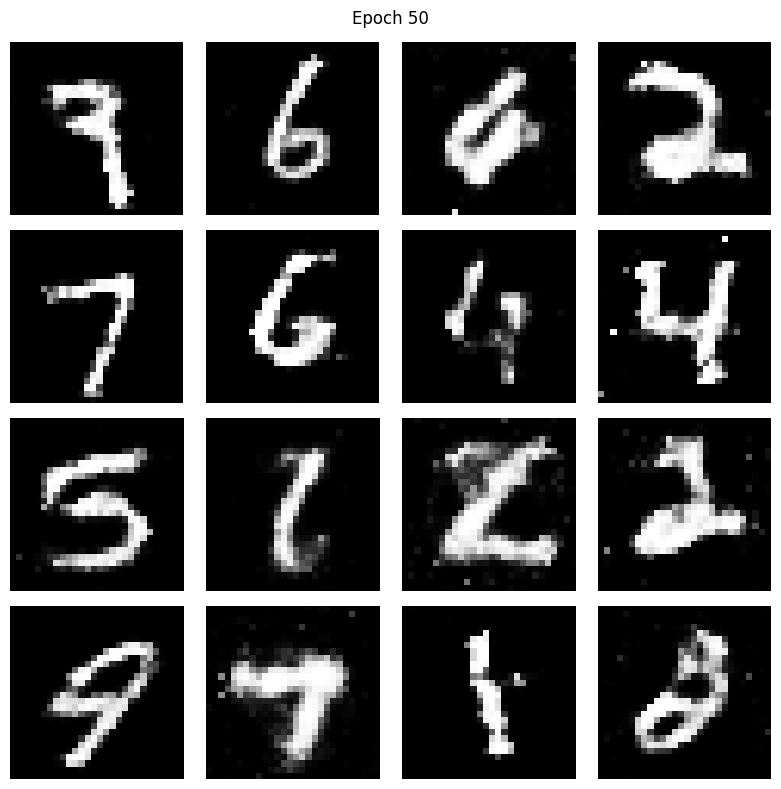

✅ Обучение завершено!


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ========== 1. Generator ==========
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28*28),
            nn.Tanh()  # выход в диапазоне [-1, 1]
        )

    def forward(self, z):
        # z: случайный шум [batch_size, latent_dim]
        img = self.model(z)
        return img.view(-1, 1, 28, 28)  # reshape в изображение

# ========== 2. Discriminator ==========
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # вероятность "это настоящее"
        )

    def forward(self, img):
        # img: изображение [batch_size, 1, 28, 28]
        img_flat = img.view(-1, 28*28)
        validity = self.model(img_flat)
        return validity

# ========== 3. Подготовка данных ==========
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # нормализуем в [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True,
                               download=True, transform=transform)
dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# ========== 4. Инициализация ==========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = Generator(latent_dim=100).to(device)
discriminator = Discriminator().to(device)

# Оптимизаторы
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCELoss()

# ========== 5. Training Loop ==========
num_epochs = 50
latent_dim = 100

for epoch in range(num_epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)

        # Метки для loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ===== Обучение Discriminator =====
        optimizer_D.zero_grad()

        # Loss на настоящих изображениях
        real_outputs = discriminator(real_imgs)
        d_loss_real = criterion(real_outputs, real_labels)

        # Генерируем fake изображения
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)

        # Loss на fake изображениях
        fake_outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(fake_outputs, fake_labels)

        # Общий loss и обновление
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # ===== Обучение Generator =====
        optimizer_G.zero_grad()

        # Generator хочет обмануть Discriminator
        # Поэтому использует real_labels!
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)
        fake_outputs = discriminator(fake_imgs)

        g_loss = criterion(fake_outputs, real_labels)

        g_loss.backward()
        optimizer_G.step()

        # ===== Логирование =====
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}] Batch {i}/{len(dataloader)} "
                  f"D_loss: {d_loss.item():.4f} G_loss: {g_loss.item():.4f}")

    # ===== Визуализация каждую эпоху =====
    with torch.no_grad():
        z = torch.randn(16, latent_dim).to(device)
        generated_imgs = generator(z).cpu()

        fig, axes = plt.subplots(4, 4, figsize=(8, 8))
        for idx, ax in enumerate(axes.flat):
            ax.imshow(generated_imgs[idx].squeeze(), cmap='gray')
            ax.axis('off')
        plt.suptitle(f'Epoch {epoch+1}')
        plt.tight_layout()
        plt.show()

print("✅ Обучение завершено!")

#### Эволюция GAN

**DCGAN (2015)**:

![dcgan](https://debuggercafe.com/wp-content/uploads/2020/07/dcgan_overall.png)


* Добавили свёрточные слои вместо fully connected
* Стало намного стабильнее
* Генерировали спальни, лица


**StyleGAN (2018-2019, NVIDIA)**:

![stylegan](https://miro.medium.com/v2/resize:fit:1400/1*TD8bftzt14hqxr-smbjHGQ.jpeg)

* Контроль на разных уровнях:

    * Грубый уровень: форма лица, поза
    * Средний уровень: черты лица, причёска
    * Мелкий уровень: текстура кожи, веснушки

```python
# Псевдокод StyleGAN

class MappingNetwork(nn.Module):
    """
    Преобразует latent code z в intermediate latent code w
    
    z: [batch, 512] - из N(0, 1)
    w: [batch, 512] - более disentangled
    """
    def __init__(self, z_dim=512, w_dim=512, num_layers=8):
        super().__init__()
        
        layers = []
        for i in range(num_layers):
            layers.append(nn.Linear(z_dim if i == 0 else w_dim, w_dim))
            layers.append(nn.LeakyReLU(0.2))
        
        self.mapping = nn.Sequential(*layers)
        
        # Pixel normalization (нормализация каждого вектора)
        self.pixel_norm = PixelNorm()
    
    def forward(self, z):
        # z: [batch, 512]
        
        # Normalize z
        z = self.pixel_norm(z)
        
        # Transform через 8 FC layers
        w = self.mapping(z)  # [batch, 512]
        
        return w


class PixelNorm(nn.Module):
    """Нормализует каждый вектор в батче к единичной длине"""
    def forward(self, x):
        # x: [batch, features]
        return x / torch.sqrt(torch.mean(x ** 2, dim=1, keepdim=True) + 1e-8)


class SynthesisNetwork(nn.Module):
    """
    Генерирует изображение из w через progressive layers
    
    w: [batch, 512] - style vector
    output: [batch, 3, 1024, 1024] - RGB image
    """
    def __init__(self):
        super().__init__()
        
        # Learned constant input (не зависит от z!)
        self.const_input = nn.Parameter(torch.randn(1, 512, 4, 4))
        
        # Список блоков для каждого разрешения
        # Каждый блок удваивает разрешение
        self.progression = nn.ModuleList([
            # resolution, in_channels, out_channels
            StyleBlock(512, 512, 4, first_block=True),   # 4×4
            StyleBlock(512, 512, 8),                      # 8×8  
            StyleBlock(512, 512, 16),                     # 16×16
            StyleBlock(512, 512, 32),                     # 32×32
            StyleBlock(512, 256, 64),                     # 64×64
            StyleBlock(256, 128, 128),                    # 128×128
            StyleBlock(128, 64, 256),                     # 256×256
            StyleBlock(64, 32, 512),                      # 512×512
            StyleBlock(32, 16, 1024),                     # 1024×1024
        ])
        
        # ToRGB для каждого уровня (progressive growing)
        self.to_rgbs = nn.ModuleList([
            ToRGB(512),  # для 4×4
            ToRGB(512),  # для 8×8
            ToRGB(512),  # для 16×16
            ToRGB(512),  # для 32×32
            ToRGB(256),  # для 64×64
            ToRGB(128),  # для 128×128
            ToRGB(64),   # для 256×256
            ToRGB(32),   # для 512×512
            ToRGB(16),   # для 1024×1024
        ])
    
    def forward(self, w, alpha=1.0, steps=9):
        """
        w: [batch, 512] или [batch, num_layers, 512] для style mixing
        alpha: для progressive growing (0→1)
        steps: сколько уровней использовать (для progressive training)
        """
        batch_size = w.shape[0]
        
        # Начинаем с константы
        x = self.const_input.repeat(batch_size, 1, 1, 1)
        
        # Проходим через все блоки
        for i, (block, to_rgb) in enumerate(zip(self.progression, self.to_rgbs)):
            if i >= steps:
                break
            
            # Style для этого уровня
            style = w if w.dim() == 2 else w[:, i]
            
            # Применяем StyleBlock
            x = block(x, style)
        
        # Финальная конвертация в RGB
        rgb = self.to_rgbs[steps - 1](x)
        
        return rgb


class StyleBlock(nn.Module):
    """
    Один блок Synthesis Network
    
    Включает:
    - Upsample (если не первый блок)
    - Conv 3×3
    - Style Modulation (AdaIN)
    - Noise Injection
    - Activation
    """
    def __init__(self, in_channels, out_channels, resolution, first_block=False):
        super().__init__()
        self.first_block = first_block
        self.resolution = resolution
        
        # Upsample layer
        if not first_block:
            self.upsample = nn.Upsample(scale_factor=2, mode='bilinear',
                                       align_corners=False)
        
        # Main convolution
        self.conv = nn.Conv2d(in_channels, out_channels,
                             kernel_size=3, padding=1)
        
        # Style modulation (AdaIN)
        self.style_mod = StyleModulation(out_channels)
        
        # Noise injection (для текстуры, деталей)
        self.noise_weight = nn.Parameter(torch.zeros(1))
        self.noise_strength = nn.Parameter(torch.zeros(1))
        
        # Activation
        self.activation = nn.LeakyReLU(0.2)
    
    def forward(self, x, style_w):
        # x: [batch, in_channels, H, W]
        # style_w: [batch, 512]
        
        # 1. Upsample (если не первый блок)
        if not self.first_block:
            x = self.upsample(x)
        
        # 2. Convolution
        x = self.conv(x)
        
        # 3. Add noise (для текстуры)
        batch, channels, height, width = x.shape
        noise = torch.randn(batch, 1, height, width, device=x.device)
        x = x + self.noise_weight * noise
        
        # 4. Style Modulation (AdaIN) - КЛЮЧЕВОЙ МОМЕНТ!
        x = self.style_mod(x, style_w)
        
        # 5. Activation
        x = self.activation(x)
        
        return x


class StyleModulation(nn.Module):
    """
    Adaptive Instance Normalization (AdaIN)
    
    Применяет стиль из w к features
    """
    def __init__(self, channels, w_dim=512):
        super().__init__()
        
        # Learned affine transform из style vector
        # w [512] → scale [channels] и bias [channels]
        self.scale_transform = nn.Linear(w_dim, channels)
        self.bias_transform = nn.Linear(w_dim, channels)
    
    def forward(self, x, w):
        # x: [batch, channels, H, W]
        # w: [batch, 512]
        
        # Instance Normalization
        # Нормализуем каждый канал независимо для каждого изображения
        mean = x.mean(dim=[2, 3], keepdim=True)  # [batch, channels, 1, 1]
        std = x.std(dim=[2, 3], keepdim=True) + 1e-8
        
        x_normalized = (x - mean) / std
        
        # Compute style parameters из w
        scale = self.scale_transform(w)  # [batch, channels]
        bias = self.bias_transform(w)    # [batch, channels]
        
        # Reshape для broadcasting
        scale = scale[:, :, None, None]  # [batch, channels, 1, 1]
        bias = bias[:, :, None, None]
        
        # Apply style: y = scale * x_norm + bias
        return scale * x_normalized + bias


class ToRGB(nn.Module):
    """Конвертирует features в RGB изображение"""
    def __init__(self, in_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, 3, kernel_size=1)
    
    def forward(self, x):
        return self.conv(x)  # [batch, 3, H, W]


class StyleGAN(nn.Module):
    def __init__(self):
        self.mapping_network = MappingNetwork()  # z → w
        self.synthesis_network = SynthesisNetwork()  # w → image
    
    def forward(self, z):
        # 1. Mapping: z → w (более disentangled)
        w = self.mapping_network(z)  # [batch, 512]
        
        # 2. Synthesis с AdaIN на каждом уровне
        x = self.constant_input  # начинаем с константы 4×4
        
        # Грубый уровень
        x = self.conv_4x4(x)
        x = AdaIN(x, w)  # применяем стиль!
        x = upsample(x)  # 4×4 → 8×8
        
        # Средний уровень
        x = self.conv_8x8(x)
        x = AdaIN(x, w)  # тот же w, но другие параметры!
        x = upsample(x)  # 8×8 → 16×16
        
        # ... и так далее до 1024×1024
        
        return x

# AdaIN layer
class AdaIN(nn.Module):
    def forward(self, x, style):
        # style → [scale, bias]
        scale = self.style_to_scale(style)
        bias = self.style_to_bias(style)
        
        # Normalize + apply style
        x_norm = (x - x.mean(dim=[2,3])) / x.std(dim=[2,3])
        return scale * x_norm + bias
```

**CycleGAN**:

![cyclegan](https://junyanz.github.io/CycleGAN/images/teaser.jpg)

* Переводит фото ↔ картины (без парных данных!)
* Лошадь → зебра
* Лето → зима
* Не нужны парные примеры "до-после"


**Где используется сейчас?**

* Дипфейки (deepfakes) - замена лиц в видео
* Super-resolution - улучшение качества старых фото
* Data augmentation - генерация дополнительных обучающих данных
* Искусство - создание картин, дизайн
* Fashion - виртуальная примерка одежды

### 1.2 VAE (Variational AutoEncoders)

![vae](https://miro.medium.com/1*r1R0cxCnErWgE0P4Q-hI0Q.jpeg)


Проблема с обычным Autoencoder

Сначала появились Autoencoders:
```
Изображение → Encoder → [Код] → Decoder → Восстановленное изображение
```

Задача: научиться сжимать и восстанавливать данные

Проблема для генерации:

* Код для каждой картинки - случайное число
* Нет структуры: код для кошки может быть [42, -17, 3], для собаки [1, 0, -5]
* Нельзя генерировать новые изображения (что закодировать?)

VAE - решение проблемы

Ключевая идея: вместо одного числа, кодируем распределение

```
Изображение → Encoder → [μ, σ] (среднее и дисперсия)
                          ↓
                    z ~ N(μ, σ) (семплируем)
                          ↓
                        Decoder
                          ↓
                  Восстановленное изображение
```

Почему это работает?

Представьте латентное пространство как карту:
```
Без VAE (обычный AE):
    Кошка #1: точка в координатах [42, -17]
    Кошка #2: точка в координатах [100, 3]
    Кошка #3: точка в координатах [-5, 20]
    
    Между точками - пустота! Если семплировать [50, 0],
    получится мусор, не кошка

С VAE:
    Все кошки - облако точек вокруг центра "кошачьей зоны"
    Если семплировать из этого облака - получится кошка!
    
    [Зона собак]  [Зона кошек]  [Зона птиц]
         ☁️            ☁️            ☁️
```


```python
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super().__init__()
        
        # ===== ENCODER =====
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 400),
            nn.ReLU(),
            nn.Linear(400, 200),
            nn.ReLU()
        )
        
        # ===== BOTTLENECK - КЛЮЧЕВАЯ ЧАСТЬ! =====
        # Вместо одного кода, предсказываем mean и std
        self.fc_mean = nn.Linear(200, latent_dim)     # μ (mu)
        self.fc_logvar = nn.Linear(200, latent_dim)   # log(σ²)
        
        # ===== DECODER =====
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 200),
            nn.ReLU(),
            nn.Linear(200, 400),
            nn.ReLU(),
            nn.Linear(400, 28*28),
            nn.Sigmoid()  # pixels в [0, 1]
        )
    
    def encode(self, x):
        """
        Encoder: image → (μ, log(σ²))
        
        Возвращаем log(σ²) вместо σ для численной стабильности
        """
        x = x.view(-1, 28*28)  # flatten
        h = self.encoder(x)
        
        mean = self.fc_mean(h)      # [batch, latent_dim]
        logvar = self.fc_logvar(h)  # [batch, latent_dim]
        
        return mean, logvar
    
    def reparameterize(self, mean, logvar):
        """
        Reparameterization Trick - МАГИЯ VAE!
        
        Вместо: z ~ N(μ, σ²)  ← нельзя backprop через sampling!
        Делаем:  z = μ + σ * ε, где ε ~ N(0,1)
        
        Теперь градиенты могут течь через μ и σ!
        """
        # Вычисляем std из logvar
        std = torch.exp(0.5 * logvar)  # σ = exp(0.5 * log(σ²))
        
        # Семплируем ε из N(0,1)
        eps = torch.randn_like(std)
        
        # z = μ + σ * ε
        z = mean + std * eps
        
        return z
    
    def decode(self, z):
        """Decoder: z → reconstructed image"""
        return self.decoder(z).view(-1, 1, 28, 28)
    
    def forward(self, x):
        """Полный forward pass"""
        # Encode
        mean, logvar = self.encode(x)
        
        # Sample z
        z = self.reparameterize(mean, logvar)
        
        # Decode
        reconstructed = self.decode(z)
        
        return reconstructed, mean, logvar
```


#### Две части loss функции
1. Reconstruction Loss (качество восстановления):

    * Насколько восстановленное изображение похоже на оригинал
    * "Ты правильно нарисовал кошку?"

2. KL Divergence (структурированность латентного пространства):

    * Заставляет распределения быть близкими к стандартному нормальному N(0, 1)
    * "Держи всех кошек в одной зоне, собак - в другой"


Проблемы VAE:

**Размытость (blurriness)**:

* Из-за MSE loss модель усредняет
* Если объект может быть в двух позициях, VAE рисует "призрак" в обеих
* Результаты менее чёткие, чем в GAN

**Trade-off между качеством и разнообразием**:

* Если сильный KL loss → всё очень гладко, но слишком похоже
* Если слабый KL loss → разнообразно, но латентное пространство хаотично

**Где используется**?

* Рекомендательные системы - понимание латентных факторов (жанр фильма, настроение музыки)
* Anomaly detection - если reconstruction loss высокий → аномалия
* Drug discovery - генерация новых молекул
* Compression - сжатие данных

### 1.2 Diffusion Models

Откуда взялась идея?

Физики заметили: многие процессы в природе работают через диффузию (распространение):

* Капля чернил в воде постепенно размывается
* Тепло распространяется от горячего к холодному

Идея: а что если обратить этот процесс?


```
Forward process (природа):
    Структура → Хаос (добавляем шум)
    
Reverse process (учим модель):
    Хаос → Структура (убираем шум)
```

![diffusion](https://www.siam.org/media/agxdzywa/figure1.jpg)

#### Как работает Forward Process

Берём чистое изображение и постепенно добавляем шум:

```
t=0:    Чёткое фото кота
t=100:  Фото с лёгким шумом
t=300:  Шум сильнее, но кот ещё виден
t=500:  Едва различимы контуры
t=700:  Почти чистый шум
t=1000: Полностью случайный шум
```

Математика проста:

```
x_t = √(коэффициент) · x_0 + √(другой_коэффициент) · шум

Где коэффициенты зависят от t
```

Это фиксированный процесс, его не обучаем!


#### Reverse Process - главная магия

Обучаем нейросеть предсказывать шум, который был добавлен:

```
Вход модели:
    - Зашумлённое изображение x_t
    - Номер шага t ("сколько шума добавлено?")

Выход модели:
    - Предсказанный шум

Затем:
    x_{t-1} = x_t - предсказанный_шум
    (Удаляем шум, движемся назад)
```

#### Почему это работает?

Модель учится на миллионах примеров:

* "На шаге 500 из этого зашумлённого изображения был добавлен вот такой шум"
* Запоминает паттерны шума для разных уровней t

Обучение

Процесс очень простой:

```
1. Берём чистое изображение
2. Выбираем случайный шаг t (например, 347)
3. Добавляем соответствующее количество шума
4. Просим модель предсказать этот шум
5. Loss = насколько точно предсказали шум
```

Всё! Никакой игры двух сетей (как в GAN), никакого KL divergence (как в VAE).


#### Генерация изображения

```
Шаг 1000: Случайный шум
Шаг 999:  Убрали немного шума
Шаг 998:  Убрали ещё чуть-чуть
...
Шаг 500:  Начинают проявляться формы
Шаг 300:  Уже видно что это кот
Шаг 100:  Детали проявляются
Шаг 0:    Чёткое изображение кота!
```

#### Почему Diffusion такие хорошие?

1. Стабильность обучения:

    * Нет adversarial игры (как в GAN)
    * Простая, понятная loss функция
    * Всегда сходится

2. Высокое качество:

    * 1000 маленьких шагов → аккуратная генерация
    * Не размывает (как VAE)
    * Нет mode collapse

3. Гибкость:

    * Легко добавить conditioning (текст, класс, sketch)
    * Можно контролировать процесс на промежуточных шагах

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ========== 1. Простой UNet ==========

class SimpleUNet(nn.Module):
    def __init__(self):
        super().__init__()

        # Time embedding
        self.time_embed = nn.Sequential(
            nn.Linear(128, 256),
            nn.SiLU(),
            nn.Linear(256, 256)
        )

        # Encoder
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1, stride=2)  # 28→14
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1, stride=2)  # 14→7

        # Bottleneck
        self.conv_mid = nn.Conv2d(256, 256, 3, padding=1)

        # Decoder
        self.up1 = nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1)  # 7→14
        self.conv4 = nn.Conv2d(128 + 128, 128, 3, padding=1)  # concat: 128+128=256 → 128

        self.up2 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)  # 14→28
        self.conv5 = nn.Conv2d(64 + 64, 64, 3, padding=1)  # concat: 64+64=128 → 64

        self.out = nn.Conv2d(64, 1, 1)

    def pos_encoding(self, t, channels):
        inv_freq = 1.0 / (10000 ** (torch.arange(0, channels, 2, device=t.device).float() / channels))
        pos_enc_a = torch.sin(t.repeat(1, channels // 2) * inv_freq)
        pos_enc_b = torch.cos(t.repeat(1, channels // 2) * inv_freq)
        pos_enc = torch.cat([pos_enc_a, pos_enc_b], dim=-1)
        return pos_enc

    def forward(self, x, t):
        # Time embedding
        t = t.unsqueeze(-1).float()
        t_emb = self.pos_encoding(t, 128)
        t_emb = self.time_embed(t_emb)  # [batch, 256]

        # Encoder
        h1 = F.relu(self.conv1(x))      # [batch, 64, 28, 28]
        h2 = F.relu(self.conv2(h1))     # [batch, 128, 14, 14]
        h3 = F.relu(self.conv3(h2))     # [batch, 256, 7, 7]

        # Add time to bottleneck
        h3 = h3 + t_emb[:, :, None, None]  # [batch, 256, 7, 7]

        # Bottleneck
        h = F.relu(self.conv_mid(h3))   # [batch, 256, 7, 7]

        # Decoder
        h = self.up1(h)                  # [batch, 128, 14, 14]
        h = torch.cat([h, h2], dim=1)    # [batch, 256, 14, 14]
        h = F.relu(self.conv4(h))        # [batch, 128, 14, 14]

        h = self.up2(h)                  # [batch, 64, 28, 28]
        h = torch.cat([h, h1], dim=1)    # [batch, 128, 28, 28]
        h = F.relu(self.conv5(h))        # [batch, 64, 28, 28]

        return self.out(h)               # [batch, 1, 28, 28]


# ========== 2. Diffusion ==========

class SimpleDiffusion(nn.Module):
    def __init__(self, timesteps=1000):
        super().__init__()
        self.timesteps = timesteps

        # Linear schedule
        betas = torch.linspace(1e-4, 0.02, timesteps)
        alphas = 1.0 - betas
        alphas_cumprod = torch.cumprod(alphas, dim=0)

        self.register_buffer('betas', betas)
        self.register_buffer('alphas', alphas)
        self.register_buffer('alphas_cumprod', alphas_cumprod)
        self.register_buffer('sqrt_alphas_cumprod', torch.sqrt(alphas_cumprod))
        self.register_buffer('sqrt_one_minus_alphas_cumprod', torch.sqrt(1.0 - alphas_cumprod))

        self.model = SimpleUNet()

    def forward(self, x, noise):
        t = torch.randint(0, self.timesteps, (x.shape[0],), device=x.device)

        sqrt_alpha = self.sqrt_alphas_cumprod[t][:, None, None, None]
        sqrt_one_minus = self.sqrt_one_minus_alphas_cumprod[t][:, None, None, None]
        x_noisy = sqrt_alpha * x + sqrt_one_minus * noise

        return self.model(x_noisy, t)

    @torch.no_grad()
    def sample(self, n_samples, device='cuda'):
        x = torch.randn(n_samples, 1, 28, 28).to(device)

        for t in reversed(range(self.timesteps)):
            t_batch = torch.full((n_samples,), t, device=device, dtype=torch.long)

            predicted_noise = self.model(x, t_batch)

            alpha = self.alphas[t]
            alpha_cumprod = self.alphas_cumprod[t]
            beta = self.betas[t]

            x = (1 / torch.sqrt(alpha)) * (
                x - ((1 - alpha) / torch.sqrt(1 - alpha_cumprod)) * predicted_noise
            )

            if t > 0:
                noise = torch.randn_like(x)
                x = x + torch.sqrt(beta) * noise

        return (x + 1) / 2


# ========== 3. Training ==========

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

model = SimpleDiffusion(timesteps=1000).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
loss_fn = nn.MSELoss()

num_epochs = 50

print("🚀 Training...")

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch_idx, (images, _) in enumerate(train_loader):
        images = images.to(device)
        noise = torch.randn_like(images)

        pred_noise = model(images, noise)
        loss = loss_fn(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch {epoch+1}/{num_epochs} [{batch_idx}/{len(train_loader)}] Loss: {loss.item():.4f}')

    avg_loss = total_loss / len(train_loader)
    print(f'==> Epoch {epoch+1} Avg Loss: {avg_loss:.4f}\n')

    # Визуализация каждые 5 эпох
    if (epoch + 1) % 2 == 0:
        print(f'📸 Sampling...')
        samples = model.sample(12, device=device)

        fig, axes = plt.subplots(3, 4, figsize=(8, 6))
        for i, ax in enumerate(axes.flat):
            ax.imshow(samples[i].cpu().squeeze(), cmap='gray')
            ax.axis('off')

        plt.suptitle(f'Epoch {epoch+1}', fontsize=14)
        plt.tight_layout()
        plt.show()

print("✅ Done!")

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.61MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.0MB/s]


Device: cuda
🚀 Training...
Epoch 1/50 [0/235] Loss: 0.9606
Epoch 1/50 [50/235] Loss: 0.1940


KeyboardInterrupt: 

#### Пример из коробки (`diffusers`)

Ссылочка: https://huggingface.co/docs/diffusers/en/index

📦 Загружаем предобученную DDPM модель для MNIST...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/143M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Device: cuda
✅ Модель загружена!

🎨 Генерируем изображения...


  0%|          | 0/50 [00:00<?, ?it/s]

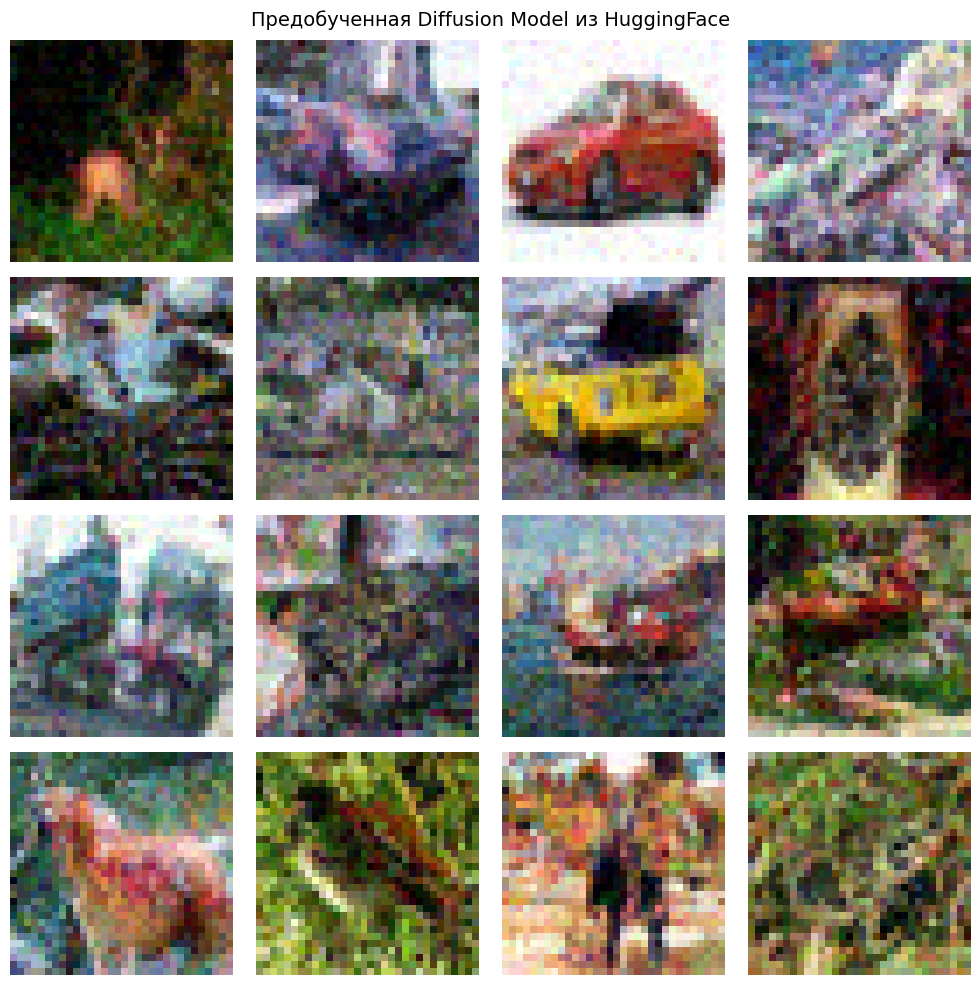


✅ Готово!

📊 Сравниваем разное количество шагов...
Генерируем с 10 шагами...


  0%|          | 0/10 [00:00<?, ?it/s]

Генерируем с 50 шагами...


  0%|          | 0/50 [00:00<?, ?it/s]

Генерируем с 1000 шагами...


  0%|          | 0/1000 [00:00<?, ?it/s]

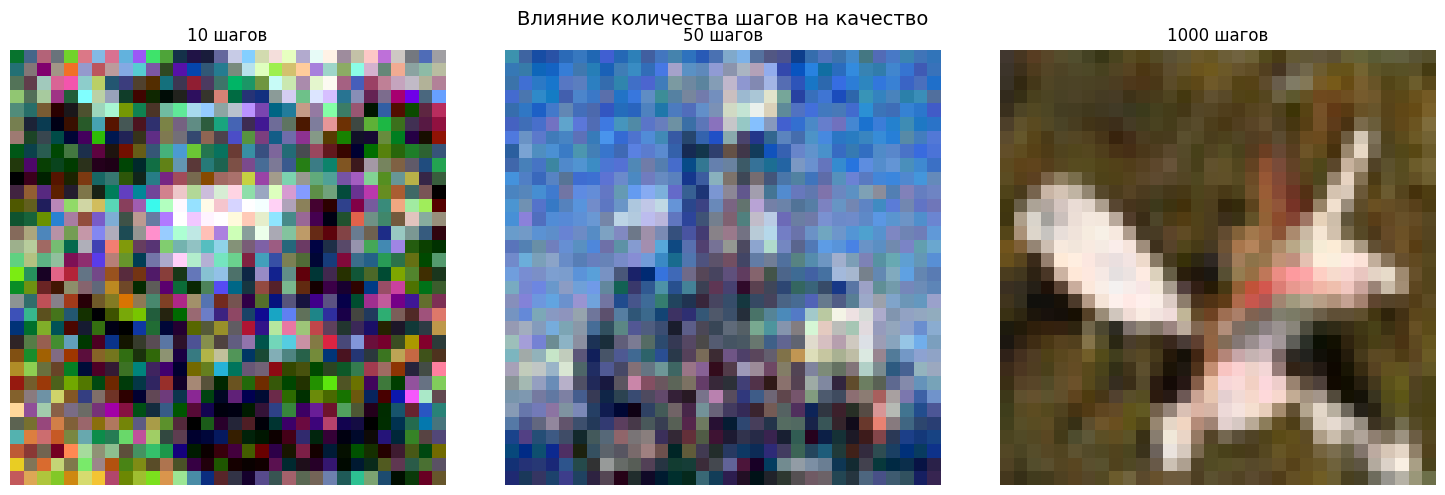

In [2]:
import torch
from diffusers import DDPMPipeline
import matplotlib.pyplot as plt

# ========== 1. Загружаем предобученную модель из HuggingFace ==========

print("📦 Загружаем предобученную DDPM модель для MNIST...")

# Используем google/ddpm-celebahq-256 или создадим с MNIST
# Для MNIST есть модель: "google/ddpm-ema-celebahq-256"
# Но лучше использовать специально обученную на MNIST

pipeline = DDPMPipeline.from_pretrained(
    "google/ddpm-cifar10-32"  # или другая маленькая модель
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

pipeline = pipeline.to(device)

print("✅ Модель загружена!")

# ========== 2. Генерация образцов ==========

print("\n🎨 Генерируем изображения...")

n_samples = 16

# Генерация
images = pipeline(
    batch_size=n_samples,
    num_inference_steps=50,  # меньше шагов = быстрее
    output_type="pil"  # PIL images
).images

# ========== 3. Визуализация ==========

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')

plt.suptitle("Предобученная Diffusion Model из HuggingFace", fontsize=14)
plt.tight_layout()
plt.show()

print("\n✅ Готово!")

# ========== 4. Дополнительно: разные количества шагов ==========

print("\n📊 Сравниваем разное количество шагов...")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, steps in enumerate([10, 50, 1000]):
    print(f"Генерируем с {steps} шагами...")

    image = pipeline(
        batch_size=1,
        num_inference_steps=steps,
        output_type="pil"
    ).images[0]

    axes[idx].imshow(image)
    axes[idx].set_title(f"{steps} шагов")
    axes[idx].axis('off')

plt.suptitle("Влияние количества шагов на качество", fontsize=14)
plt.tight_layout()
plt.show()

#### Conditional Generation - Text-to-Image

Мы с Вами рассмотрели Uncoditional Generation, где по сути мы просто умеем генерировать рандомную картинку на основе такого датасета, который у нас был в обучении.

Но как, например, сгенерировать картинку, где "Мультяшная Панда катается на скейтборде по поврехности луны, попивая смузи"?

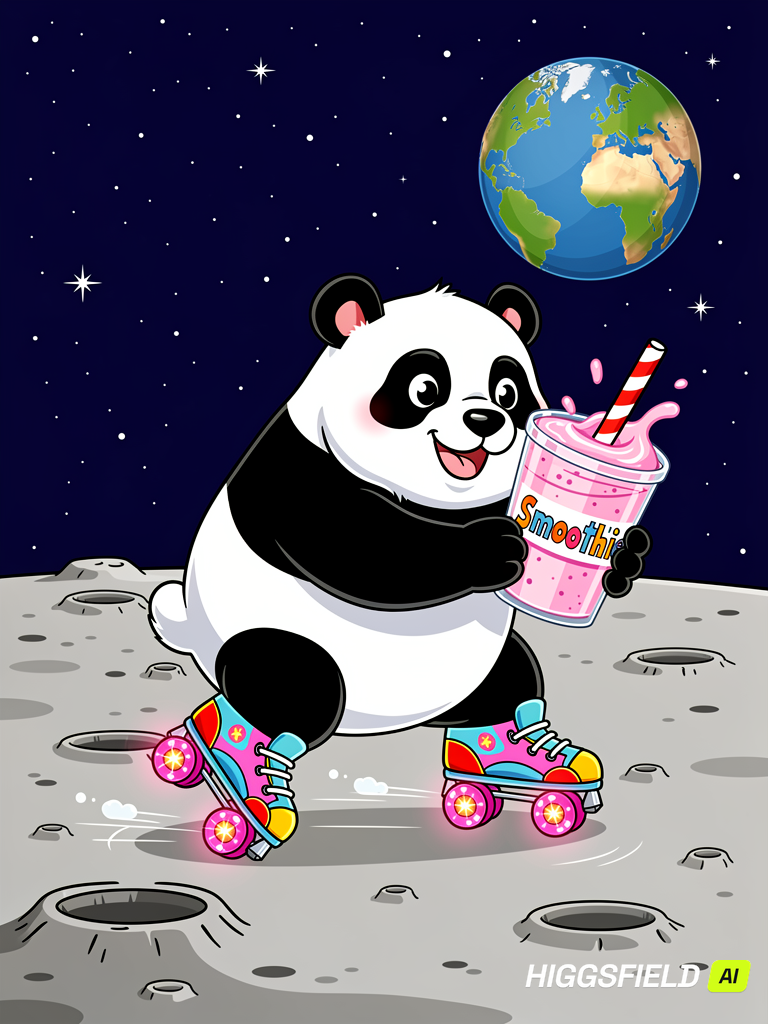




Как добавить текст?

Вместо:

```
Модель(зашумлённое_изображение, t) → шум
```

Делаем:

```
Модель(зашумлённое_изображение, t, текстовое_описание) → шум
```

Модель учится генерировать шум так, чтобы итоговое изображение соответствовало описанию!
Пример:

```
Промпт: "A cat wearing a wizard hat, oil painting"

Модель на каждом шаге:
- Убирает шум
- Направляет процесс к "коту в шляпе волшебника"
- Учитывает стиль "масляная живопись"
```

### Conditional Latent Diffusion Models - Text-to-Image революция


#### Latent Diffusion - первое улучшение
Идея: работать не с пикселями, а с compressed representation. Это же быстрее!

![latent_df](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/latent-diffusion-arch.png)


#### Conditional - добавляем контроль!
Основная идея: UNet должен видеть не только зашумлённое изображение, но и условие (текст)


##### Как закодировать текст?
CLIP Text Encoder! (обсудим его чуть более детально в следующей секции)

```
Text Prompt: "a cat wearing a wizard hat"
    ↓
CLIP Text Encoder (Transformer)
    ↓
Text Embedding [77, 768]
    ↓
Cross-Attention в UNet
    ↓
UNet понимает что генерировать!
```

# 1.3. Vision-Language Models (VLM) - мосты между зрением и языком



## Часть 1. Vision-Language Models - объединение миров

Основная идея: модель которая понимает И изображения, И текст одновременно

```
Изображение + Текст → VLM → Ответ

Примеры:
    Фото кота + "Что на изображении?" → "На изображении кот"
    Фото еды + "Это полезно?" → "Да, это салат с овощами"
    Скетч + "Нарисуй реалистично" → Фотореалистичное изображение
```

**Зачем это нужно?**
1. Понимание изображений на естественном языке:

```
Вместо: classify(image) → "cat"
Можно: ask(image, "What is this animal doing?")
       → "The cat is sleeping on a couch"
```

---

2. Поиск изображений по описанию:
```
"Find me photos of sunset over mountains"
→ ищет в базе изображений которые соответствуют описанию
```

---

3. Визуальный вопрос-ответ (Visual Question Answering):

```
Изображение: [кухня с холодильником]
Вопрос: "How many eggs are in the fridge?"
Ответ: "There are 6 eggs"
```

---

4. Генерация изображений из текста:

```
"A steampunk robot playing chess in Victorian London"
→ Stable Diffusion генерирует изображение
```

## Часть 2.  Модальности - что такое multimodal?

Что такое модальность?

Модальность = тип данных, способ восприятия информации

```
Текст: слова, предложения, документы
Изображения: пиксели, цвета, формы
Аудио: звуковые волны, частоты
Видео: последовательность изображений + звук
```

Multimodal (несколько модальностей):

```
CLIP: изображения + текст
Flamingo: изображения + текст (диалог)
GPT-4V: изображения + текст + reasoning

Преимущество: понимают связи между разными типами данных
```

---


Сложность **multimodal** обучения

Проблема alignment (выравнивание модальностей):

```
В разных модальностях одно и то же понятие выглядит по-разному:

Текст: "cat" - 3 символа, ASCII коды
Изображение: [пиксели 640×480×3] - миллион чисел

Как научить модель что это ОДНО И ТО ЖЕ?
```

Решение: обучить модель находить общее представление (embedding space)

```
"cat" (текст) → Encoder → [вектор 512]
                              ↓ похожие!
🐱 (изображение) → Encoder → [вектор 512]
```


## Часть 3. CLIP - революция в Vision-Language

История: до CLIP

Классический подход (ImageNet era):

```
1. Собрали датасет: 1M изображений с фиксированным набором меток
   ["кошка", "собака", "автомобиль", ...] (ровно 1000 дискретных классов)

2. Обучили CNN решать задачу классификации:
   Изображение → Вероятность по каждому из 1000 классов

3. Ключевые ограничения:
   - Жёсткая привязка к 1000 классам. Вне этого списка — слепота.
   - Чтобы добавить новый класс (например, "капибара"), нужно:
      * Собрать новый датасет
      * Полностью переобучить модель (fine-tuning)
```

Zero-shot learning (попытки решить проблему):

```
Идея: модель должна распознавать классы, которых не видела
```

### CLIP (Contrastive Language-Image Pre-training, OpenAI, 2021)

Ссылочка: https://openai.com/index/clip/

Главная идея: обучить модель на парах (изображение, текст)

![clip](https://miro.medium.com/1*tg7akErlMSyCLQxrMtQIYw.png)


Датасет: 400 миллионов пар (изображение, подпись) из интернета


Примеры пар:

```
Изображение: [фото кота]
Текст: "A fluffy orange cat sitting on a windowsill"

Изображение: [фото машины]
Текст: "Red Tesla Model 3 parked on a street"

Изображение: [закат]
Текст: "Beautiful sunset over the ocean"
```


Соотвественноо

```
"a cat" близко к:
    - "a kitten"
    - "a fluffy cat"
    - "orange cat"
    - [изображения котов]

"a cat" далеко от:
    - "a car"
    - "a tree"
    - [изображения машин]
```


Если более явно:

1. Показали 400 миллионов пар: картинка + её описание на обычном языке
2. Например: «Фотография рыжего кота, спящего на диване», «Схема метро Лондона», «Мем про понедельник»
3. Задача была простая: научиться понимать, какое описание подходит к какой картинке

То есть во время обучения CLIP не знал, что через 2 года кто-то захочет искать "капибару". Он просто учился общую задачу: "Это изображение соответствует этому текстовому описанию?"


#### Prompt Engineering для CLIP

Промпт важен для точности!

```
Плохой промпт:
    "cat" → низкая точность
    
Хороший промпт:
    "a photo of a cat" → средняя точность
    
Отличный промпт:
    "a photo of a cat, a type of animal" → высокая точность
```


### Какие есть современные VLM архитектуры?

```
2021: CLIP
      - Понимает связь изображение ↔ текст
      - Но не генерирует текст
      
2022: Flamingo (DeepMind)
      - Может вести диалог об изображениях
      - Few-shot learning
      
2023: GPT-4V (OpenAI)
      - Полноценное понимание + reasoning
      - Может объяснять мемы, решать задачи по геометрии
      
2024: Gemini (Google)
      - Native multimodal (обучен с нуля на всех модальностях)
```

В целом, мы живём в эпоху, где новые VLM появляются практически каждую неделю..

### Применения VLM

1. Visual Question Answering (VQA)

```
Задача: ответить на вопрос об изображении

Пример:
    Image: [кухня]
    Q: "How many chairs are there?"
    A: "There are 4 chairs"
    
    Q: "Is the stove on?"
    A: "No, the stove is off"
```

---

2. Image Captioning

```
Автоматическая генерация описаний

Image: [закат над океаном]
Caption: "A beautiful sunset over the ocean with
          orange and pink clouds reflecting on the water"
          
Применения:
- Accessibility (для слабовидящих)
- Автоматическая индексация фото
- Соцсети (автоподписи)
```

---

3. Visual Reasoning

```
Решение задач требующих понимания + логики

Image: [диаграмма Венна]
Q: "If A contains {1,2,3} and B contains {2,3,4},
    what is A ∩ B?"
A: "The intersection is {2, 3}"
```

---

4. Multimodal Search

```
Поиск по изображению + текст

Запрос: "Find images similar to this one but at sunset"
    ↓
CLIP находит похожие + фильтрует по "sunset"
```

---

5. Content Moderation

```
Автоматическая проверка контента

Image + "Does this contain violence?"
VLM: "No" или "Yes, contains violent imagery"

Быстрее и дешевле человеческой модерации
```

### Ключевые принципы VLM

1. Shared Embedding Space:
```
Разные модальности → одно пространство
Позволяет сравнивать изображения и текст
```
2. Contrastive Learning:
```
Положительные пары близко
Отрицательные далеко
Основа CLIP
```
3. Преобучение + Fine-tuning:
```
Pretraining: большие данные без аннотаций
Fine-tuning: меньше данных, специфические задачи
```
4. Scale matters:
```
Больше данных → лучше понимание
400M пар (CLIP) → работает zero-shot
```

### Открытые проблемы:
1. Hallucination:
```
VLM может "придумывать" детали которых нет на изображении

Image: [2 кота]
Q: "How many cats?"
VLM: "There are 3 cats"

Модель иногда галлюцинирует
```

2. Spatial Reasoning:
```
Плохо понимает пространственные отношения

"left of", "behind", "between" - сложно для VLM
```

3. Compositionality:
```
"red car" ✅
"car to the left of tree" ❌

Сложные композиционные запросы тяжелы
```
4. Bias:
```
Наследует предубеждения из обучающих данных
Требует осторожности в применении
```


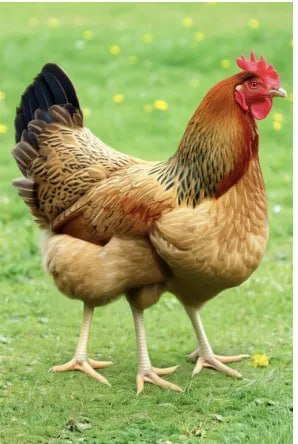

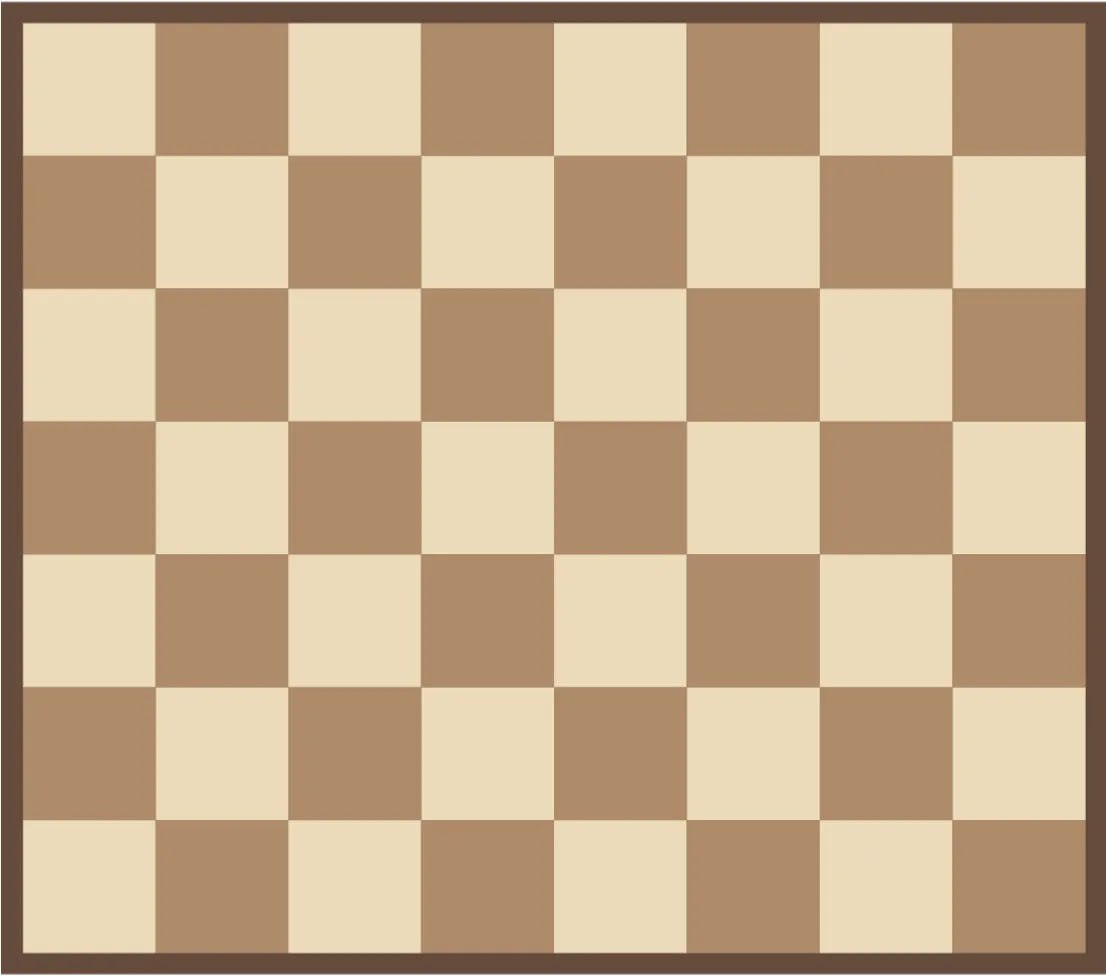

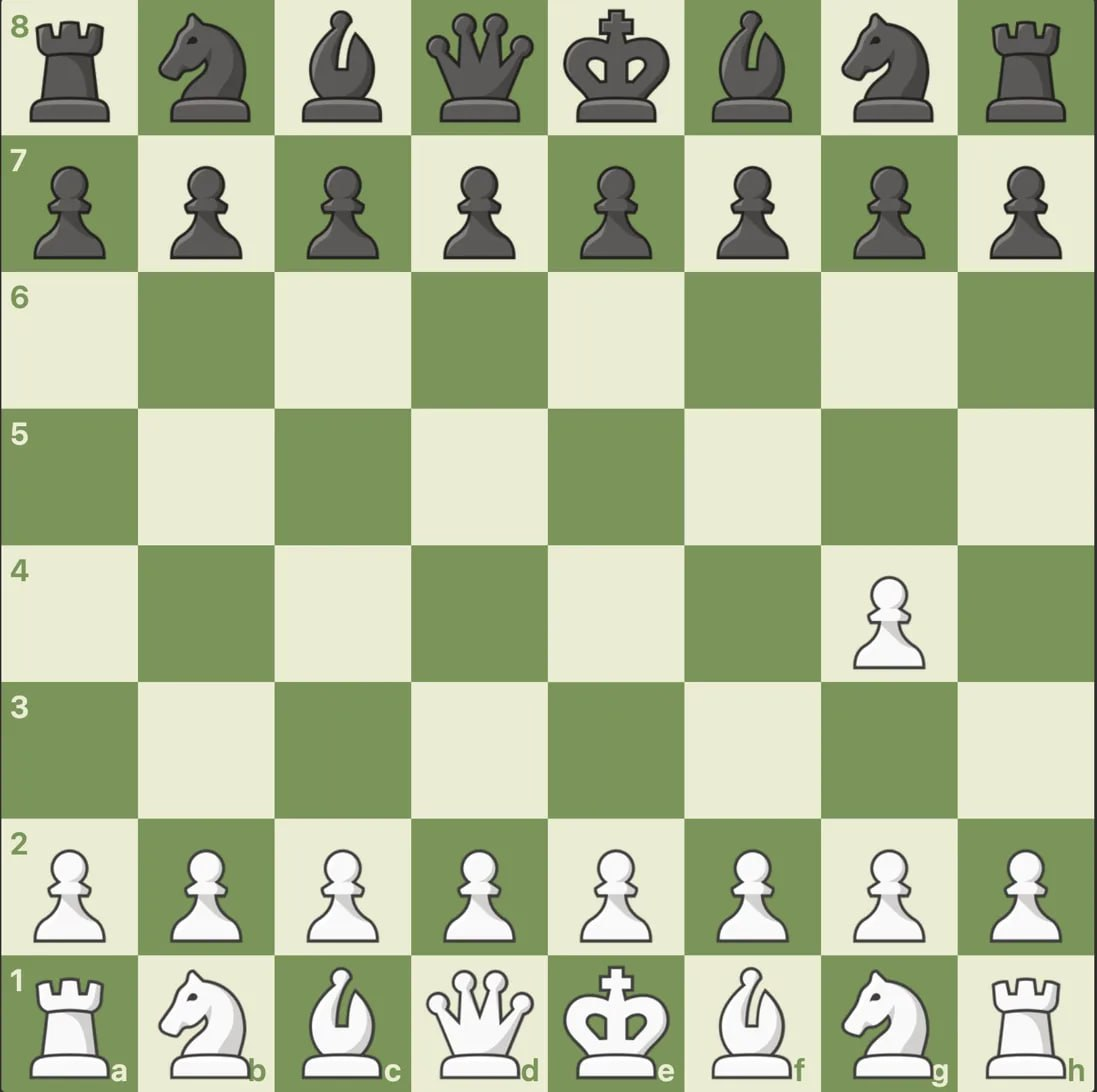

Промпты и ответы:
1. How many legs does this animal have? Answer with a number in curly brackets, e.g., {9}. — Looking at this chicken in the image, I can see it has two legs, which is standard for all birds. {2}
2. How many rows are there on this board? Answer with a number in curly brackets, e.g., {9}. — Looking at this chessboard, I can count the horizontal rows from top to bottom. Each row spans the full width of the board with 8 squares. Counting from top to bottom, I can see 8 distinct rows. {8}
3. How many chess pieces are there on this board? Answer with a number in curly brackets, e.g., {9}. — I'll count all the chess pieces on this board systematically.
  * Black pieces (on ranks 7-8):

    * Rank 8: 8 pieces (rook, knight, bishop, queen, king, bishop, knight, rook)
    * Rank 7: 8 pawns
    * Total black pieces: 16

  * White pieces (on ranks 1-2 and 4):

    * Rank 1: 8 pieces (rook, knight, bishop, queen, king, bishop, knight, rook)
    * Rank 2: 7 pawns
    * Rank 4: 1 pawn (at g4)
    * Total white pieces: 16

Total pieces on the board: 16 + 16 = 32
{32}

In [2]:
# !pip install torch torchvision ftfy regex
# !pip install git+https://github.com/openai/CLIP.git

In [8]:
import torch
import clip
from PIL import Image
import os

# Загружаем модель
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Открываем локальное изображение
image_path = "/content/ee03a556-c289-4f61-b2db-ccfe1e871c0f.png"  # замените на путь к вашему изображению
if os.path.exists(image_path):
    image = Image.open(image_path)

    # Подготавливаем изображение
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Создаём более сложные запросы
    # CLIP понимает сложные описания!
    prompts = [
        "a cute cat playing with a ball",
        "a dog running in the park",
        "a beautiful sunset over mountains",
        "a plate of delicious food",
        "a modern city skyline at night",
        "a scientific diagram or chart",
        "a screenshot from a video game",
        "a cartoon panda skating on the Moon",
        "a cartoon panda skating",
        "panda",
        "a photo of a panda"
    ]

    # Токенизируем все запросы
    text = clip.tokenize(prompts).to(device)

    # Предсказание
    with torch.no_grad():
        logits_per_image, _ = model(image_input, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    # Выводим топ-3 предсказания
    print("\n🔍 Анализ изображения:")
    print("-" * 50)

    # Сортируем по вероятности
    sorted_indices = probs[0].argsort()[::-1]
    for i in sorted_indices[:3]:  # топ-3
        prob = probs[0][i] * 100
        print(f"{prob:5.1f}% - {prompts[i]}")
    print("-" * 50)
else:
    print(f"Файл {image_path} не найден!")


🔍 Анализ изображения:
--------------------------------------------------
 97.8% - a cartoon panda skating on the Moon
  2.2% - a cartoon panda skating
  0.0% - a photo of a panda
--------------------------------------------------
